Student first name: Grace

---


Student last name: Aiyedogbon


---


Student number: 2611301299

# Assignment 1 - total points 15

1. (total 2 points) Chapter 1 [Hands-On Data Preprocessing in Python](https://www.packtpub.com/product/hands-on-data-preprocessing-in-python/9781801072137)

##### Excercise 3
For this exercise you need to use a new dataset: billboard.csv. Visit https://www.billboard.com/charts/hot-100 and see the latest song rankings of the day. This dataset presents information and ranking of 317 song tracks in 80 columns. The first four columns are artist, track, time, and date_e. The first columns are intuitive descriptions of song tracks. The column date_e shows the date that the songs entered the hot-100 list. The rest of 76 columns are songs ranking at the end of each weeks from 'w1' to 'w76'. Download and read this dataset using pandas and answer the following questions.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from functools import partial

In [5]:
from dotenv import load_dotenv

from pathlib import Path

env_path = Path("../../.env-live")

if env_path.exists():
    print('envs Loaded')
    load_dotenv(dotenv_path=env_path)
from jrjModelRegistry.jrjModelRegistry import registerAJrjModel

In [6]:
bb_df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter01/billboard.csv')
bb_df.head()

,artist,track,time,date_e,w1,w2,w3,w4,w5,w6,...,w67,w68,w69,w70,w71,w72,w73,w74,w75,w76
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0,33.0,23.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0,5.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0,31.0,20.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0,14.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0,29.0,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Exploring the dataset - We have 80 columns and 317 rows
bb_df.describe

<bound method NDFrame.describe of                   artist                                  track  time  \
0        Destiny's Child               Independent Women Part I  3:38   
1                Santana                           Maria, Maria  4:18   
2          Savage Garden                     I Knew I Loved You  4:07   
3                Madonna                                  Music  3:45   
4    Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   
..                   ...                                    ...   ...   
312     Ghostface Killah                       Cherchez LaGhost  3:04   
313          Smith, Will                            Freakin' It  3:58   
314        Zombie Nation                          Kernkraft 400  3:30   
315       Eastsidaz, The                               Got Beef  3:58   
316               Fragma                         Toca's Miracle  3:22   

         date_e  w1    w2    w3    w4    w5    w6  ...  w67  w68  w69  w70  \
0    2000-0

In [8]:
#Exploration 2
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 80 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   artist  317 non-null    object 
 1   track   317 non-null    object 
 2   time    317 non-null    object 
 3   date_e  317 non-null    object 
 4   w1      317 non-null    int64  
 5   w2      312 non-null    float64
 6   w3      307 non-null    float64
 7   w4      300 non-null    float64
 8   w5      292 non-null    float64
 9   w6      280 non-null    float64
 10  w7      269 non-null    float64
 11  w8      260 non-null    float64
 12  w9      253 non-null    float64
 13  w10     244 non-null    float64
 14  w11     236 non-null    float64
 15  w12     222 non-null    float64
 16  w13     210 non-null    float64
 17  w14     204 non-null    float64
 18  w15     197 non-null    float64
 19  w16     182 non-null    float64
 20  w17     177 non-null    float64
 21  w18     166 non-null    float64
 22  w1

    a)	(1point) Write one line of code that gives you a great idea of how many null values each column has. If there are any columns that have no non-null values drop them.

In [9]:
#Showing an aggregate of the values that are null from the data set 
bb_df.isnull().sum()

artist      0
track       0
time        0
date_e      0
w1          0
         ... 
w72       317
w73       317
w74       317
w75       317
w76       317
Length: 80, dtype: int64

In [10]:
#Showing the columns that have null values 
bb_df.isna()

,artist,track,time,date_e,w1,w2,w3,w4,w5,w6,...,w67,w68,w69,w70,w71,w72,w73,w74,w75,w76
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
313,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
314,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
315,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [11]:
#Dropping null columns - As theres a mix of null values in rows and columns that with non-null values
bb_df_cl_cols = bb_df.dropna(axis=1, how='all')
print (bb_df_cl_cols.isnull().sum())

artist      0
track       0
time        0
date_e      0
w1          0
         ... 
w61       315
w62       315
w63       315
w64       315
w65       316
Length: 69, dtype: int64


    b)	(1 point) With a for loop, draw and study the values in each of the remaining W columns. (hint for each w column draw histogram and box plot)

In [12]:
#Importing needed plots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

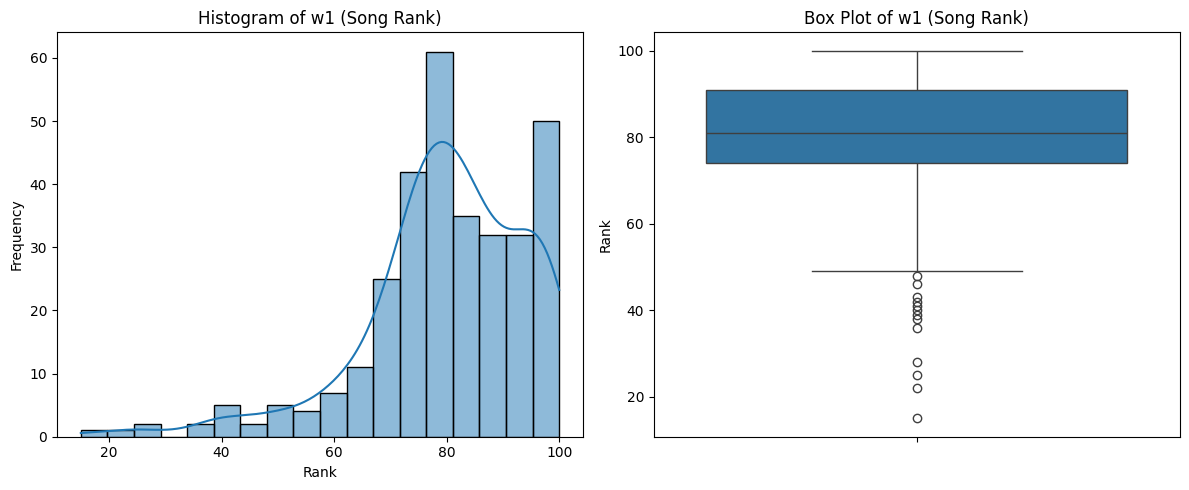

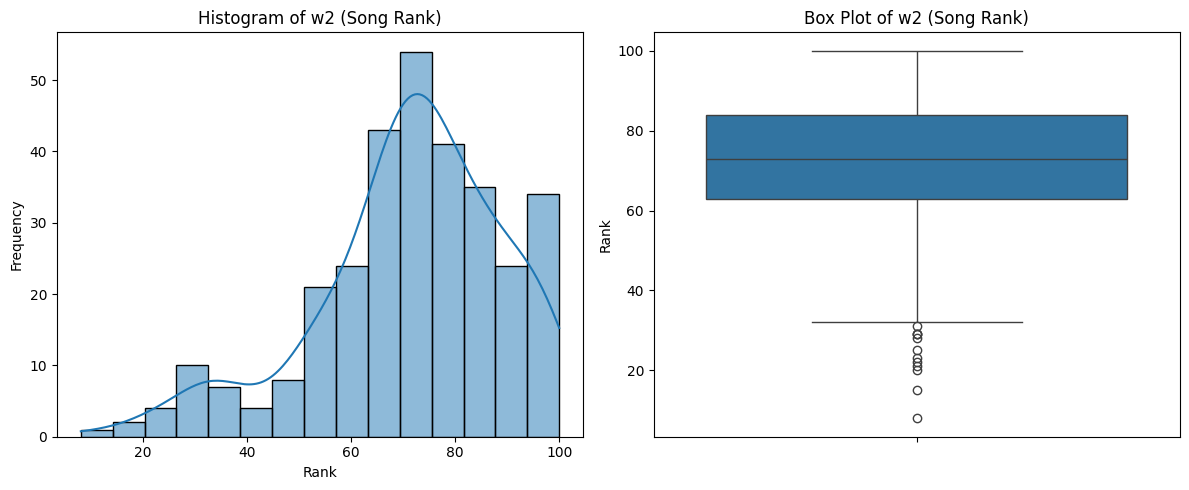

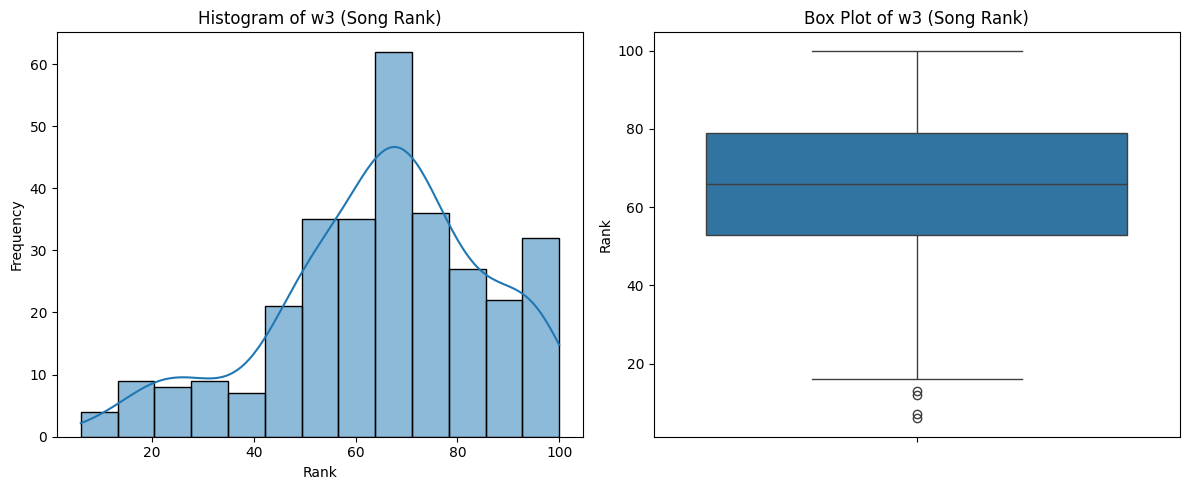

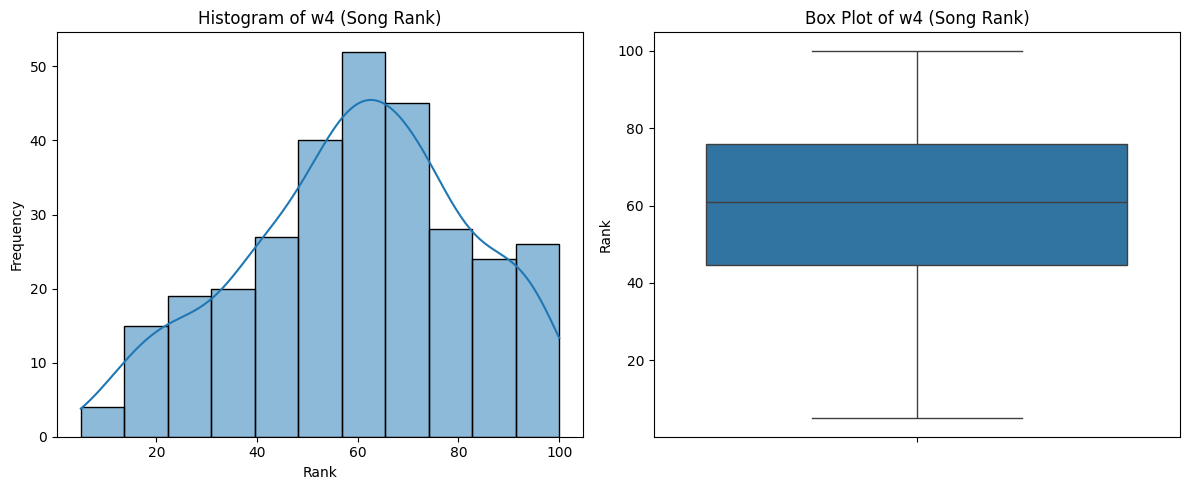

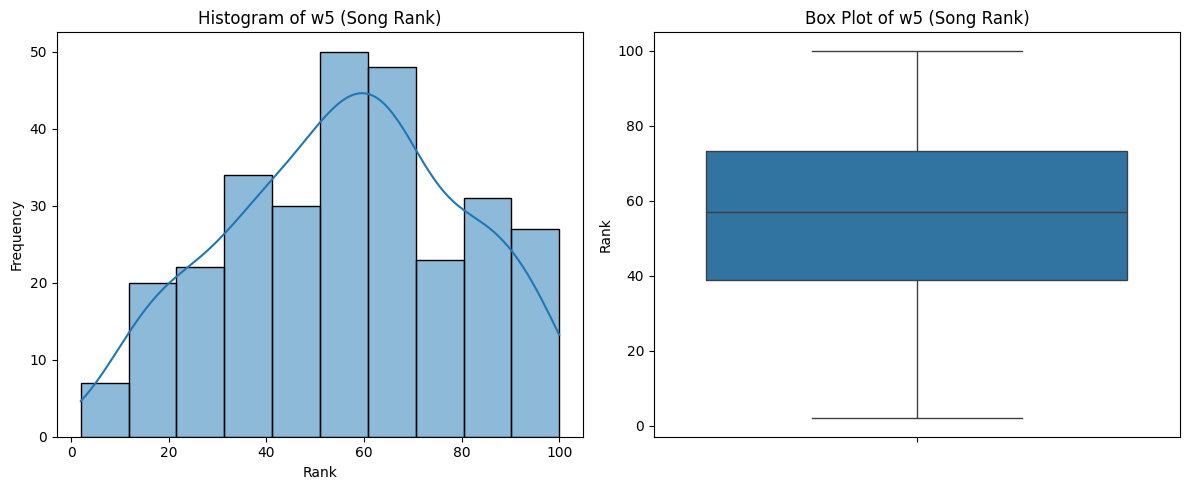

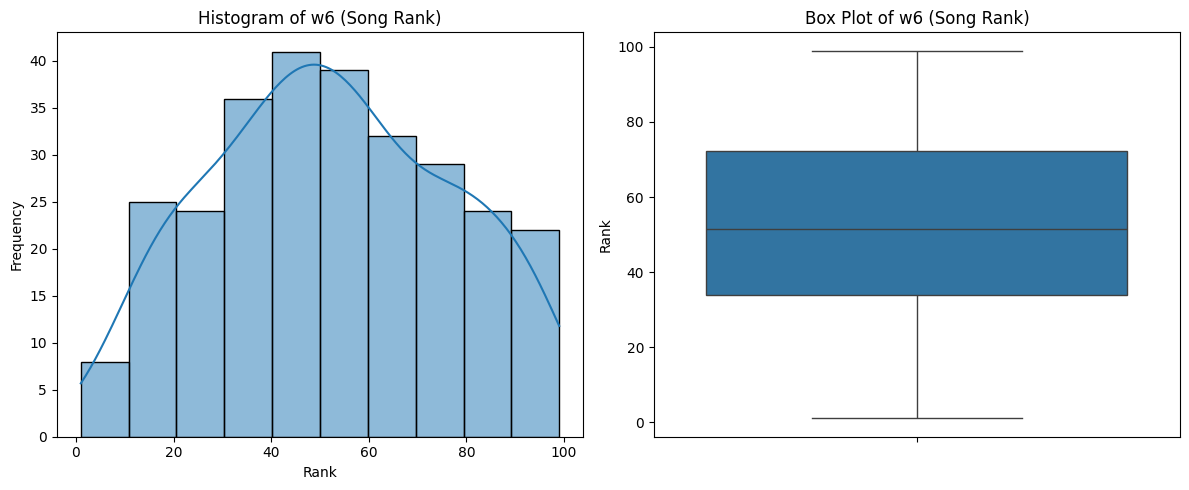

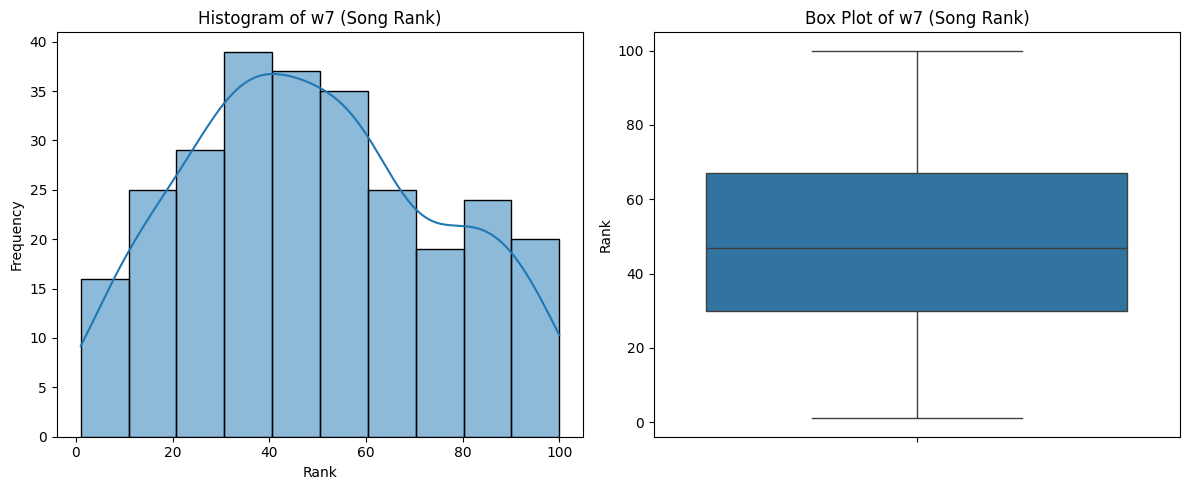

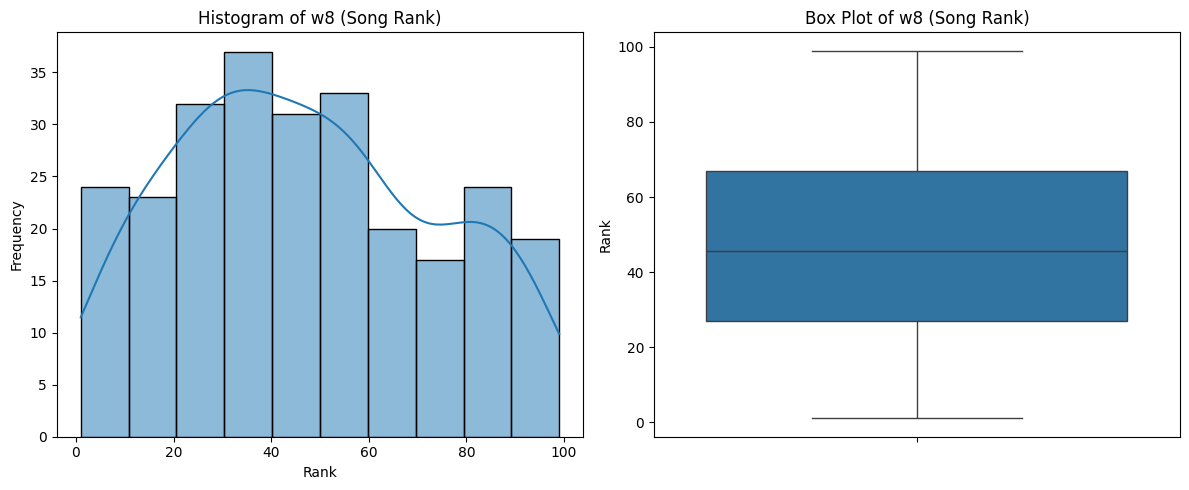

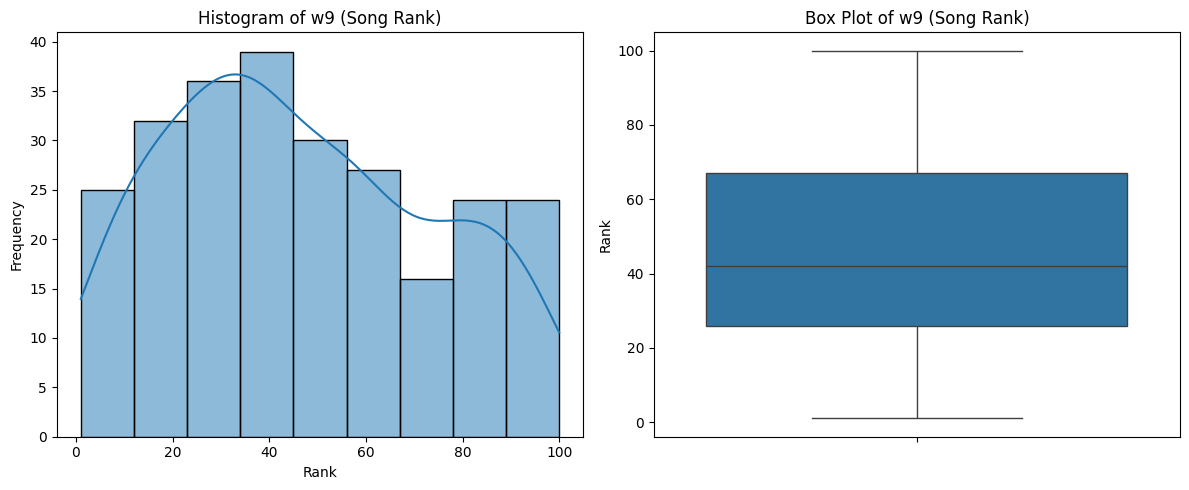

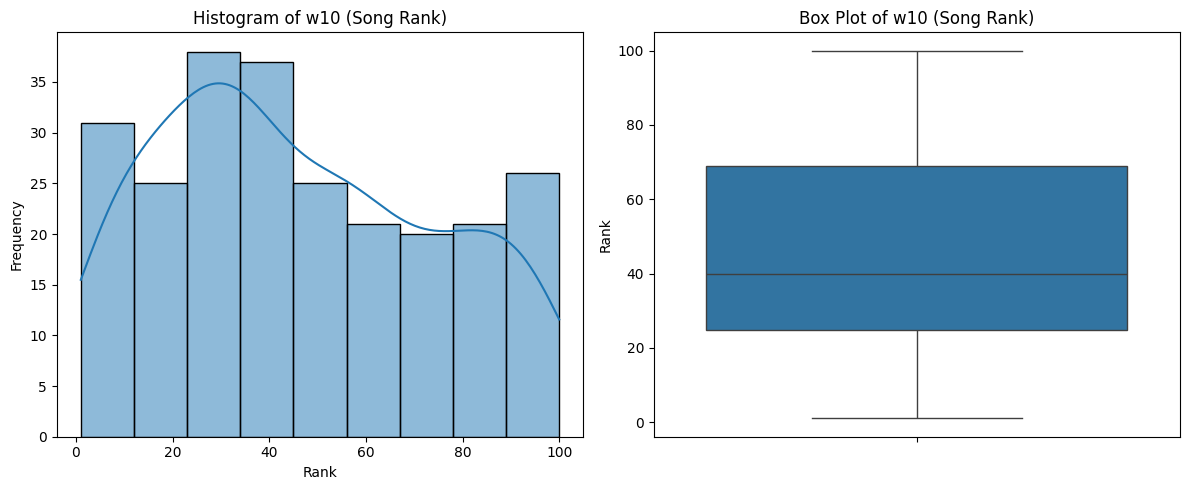

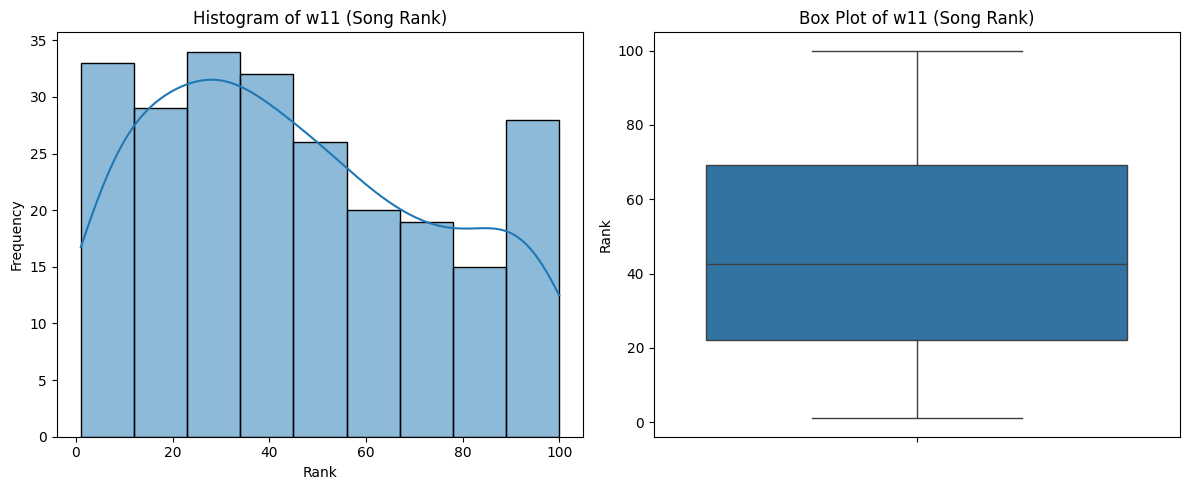

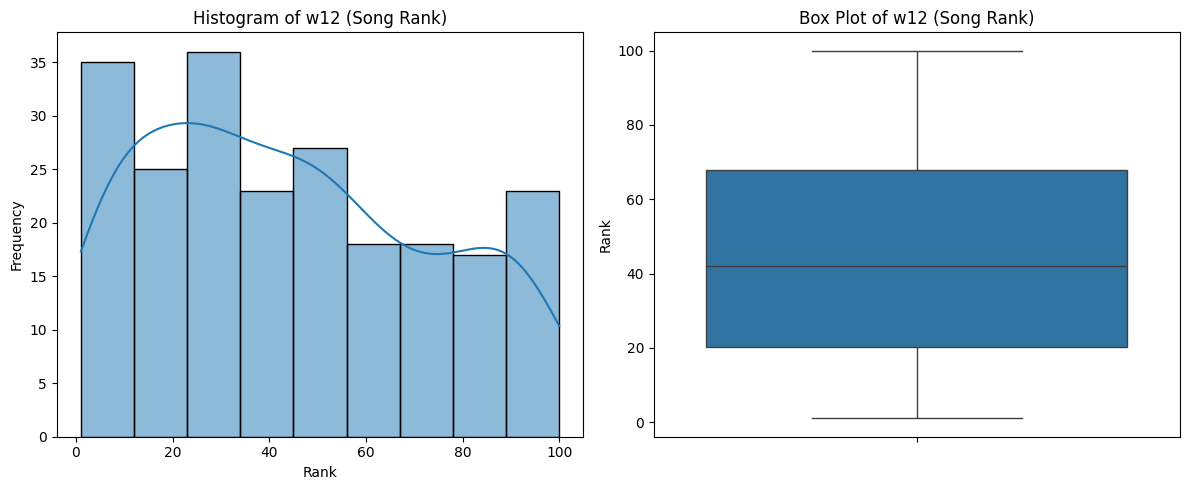

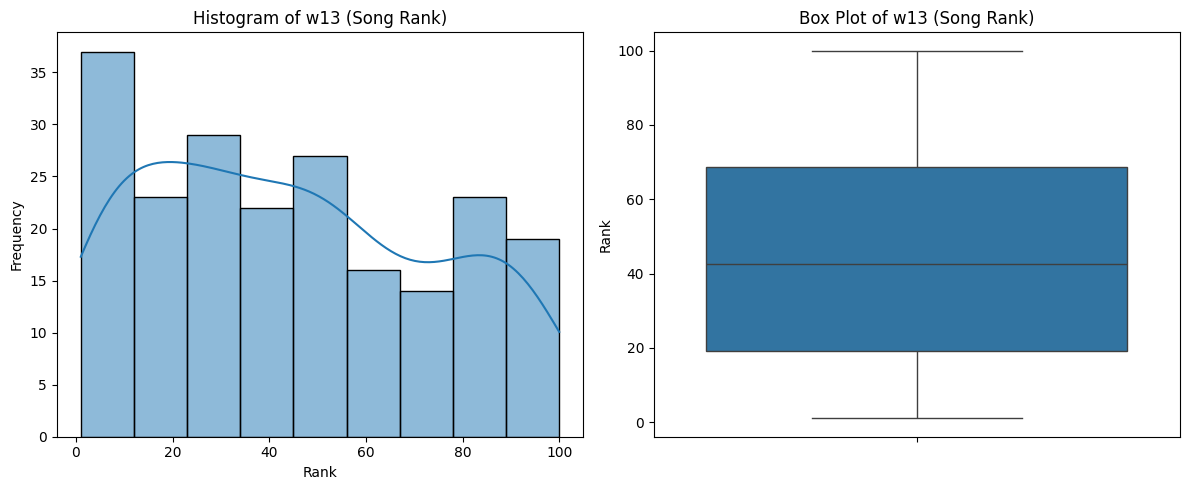

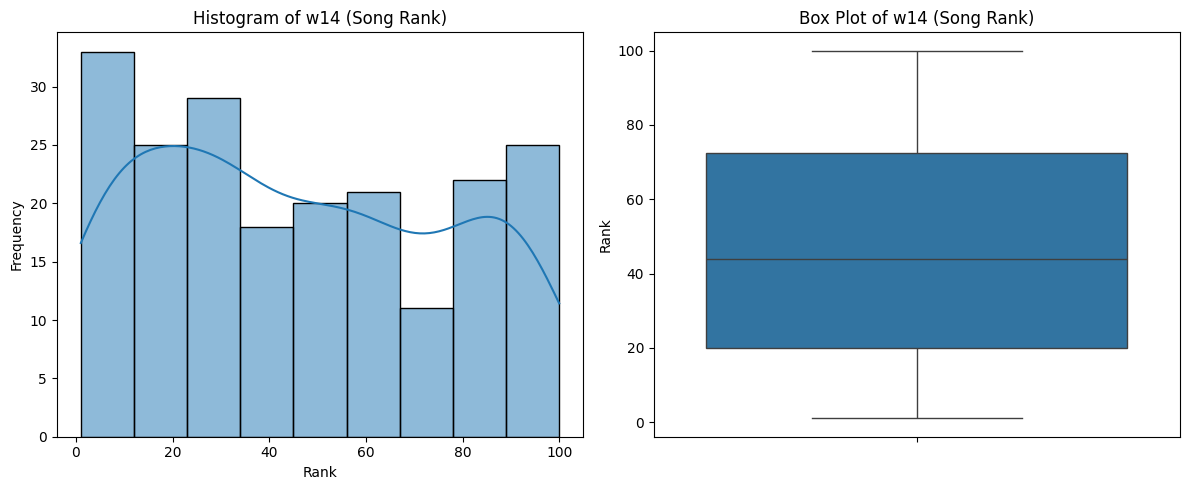

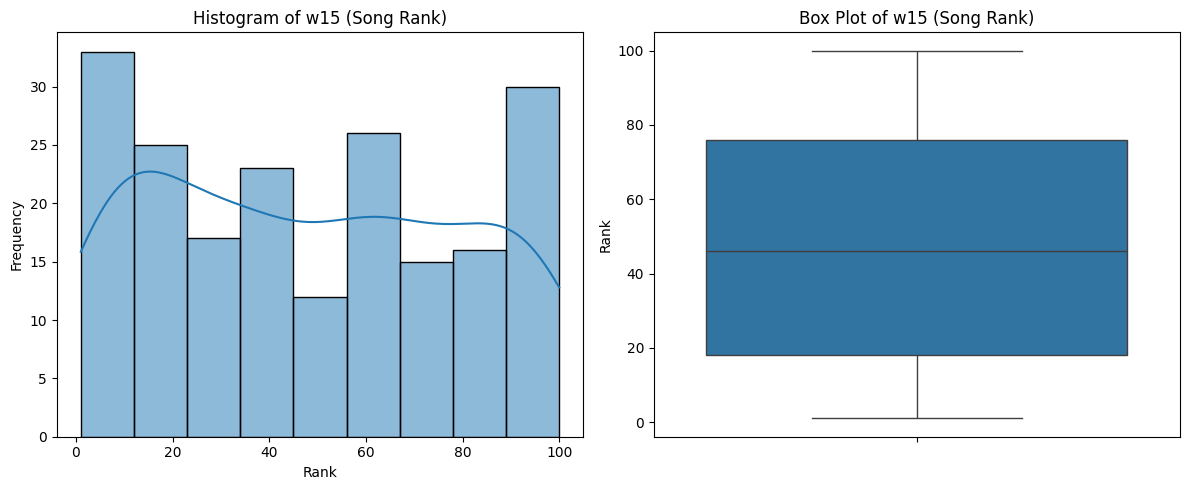

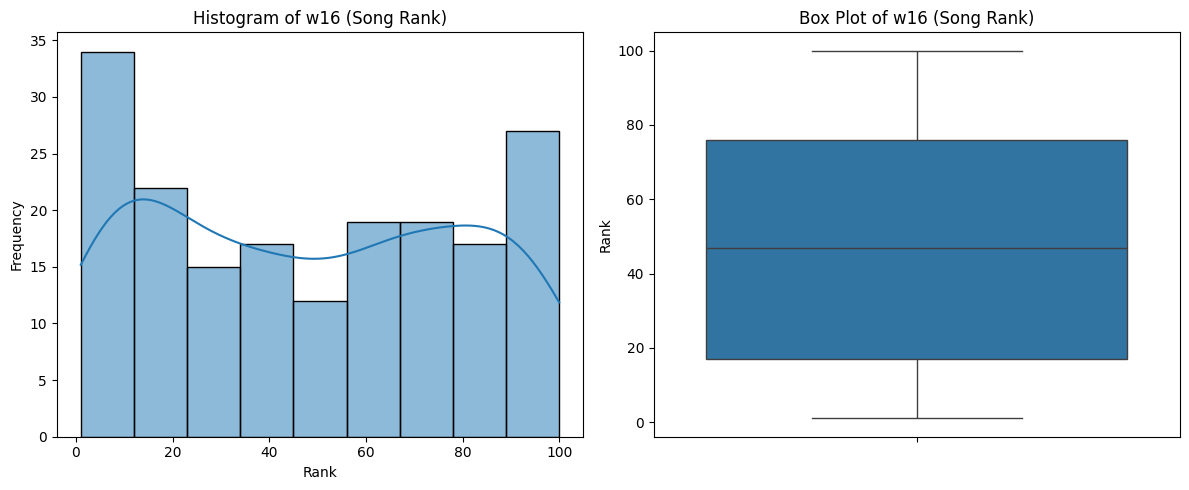

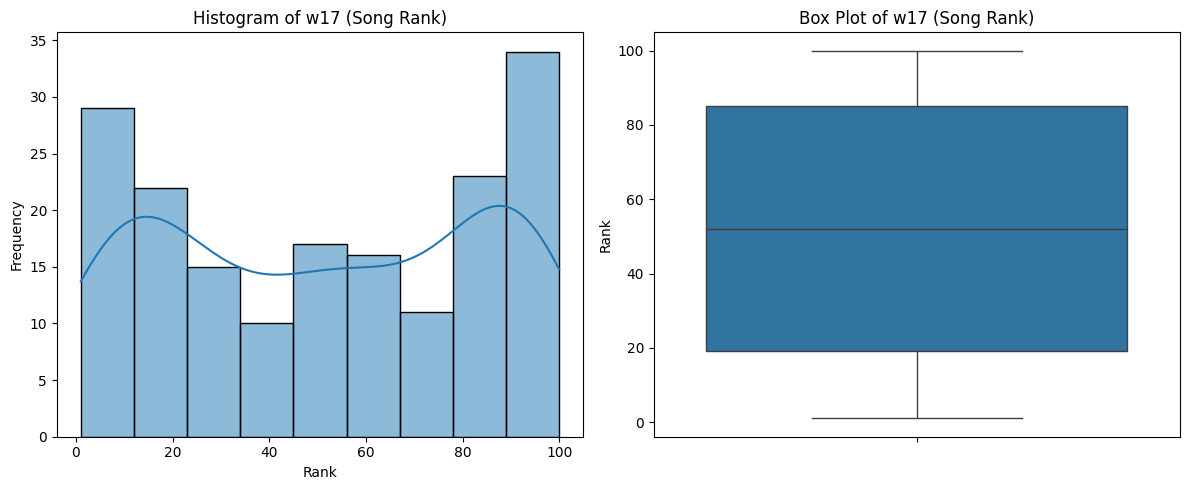

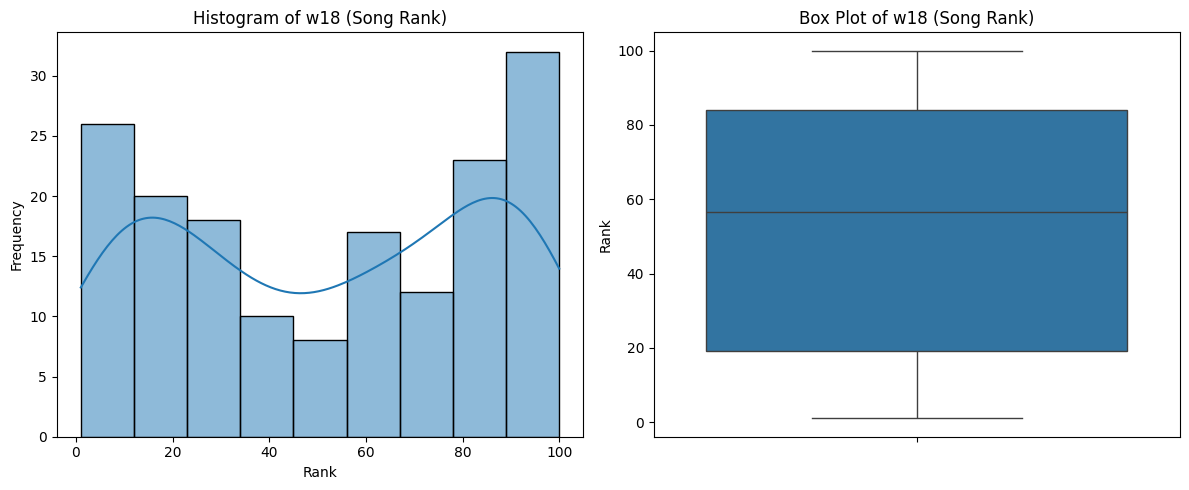

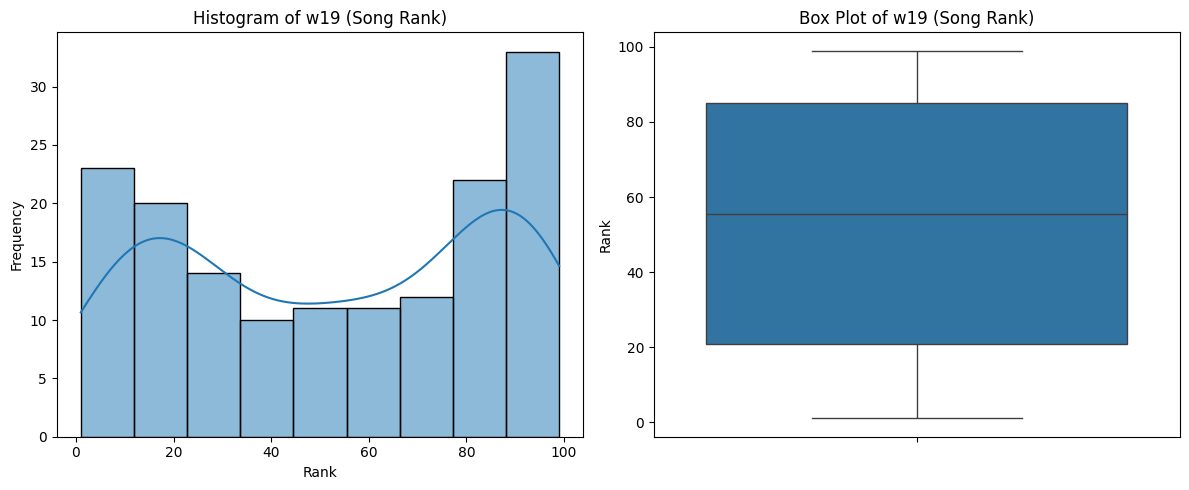

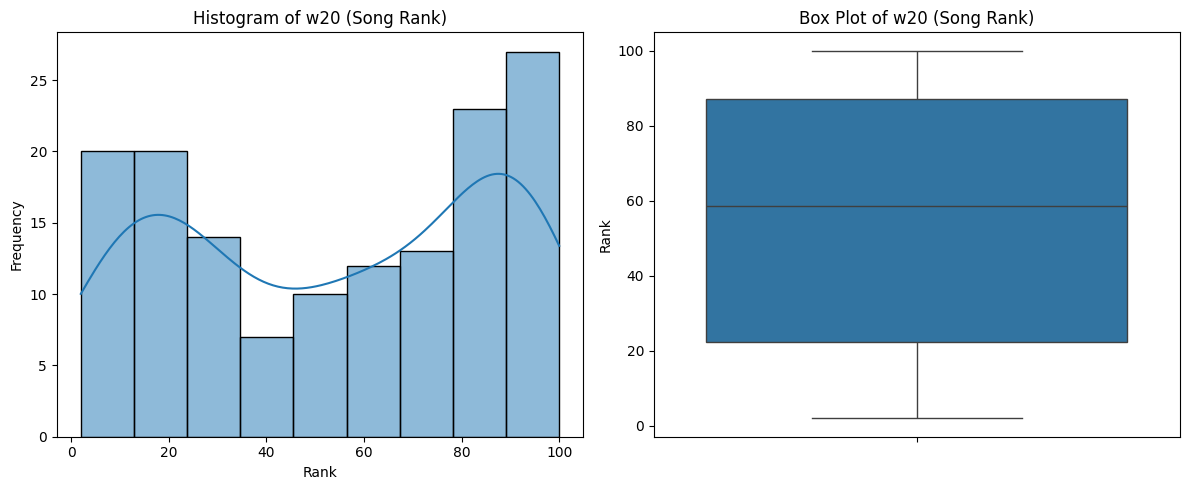

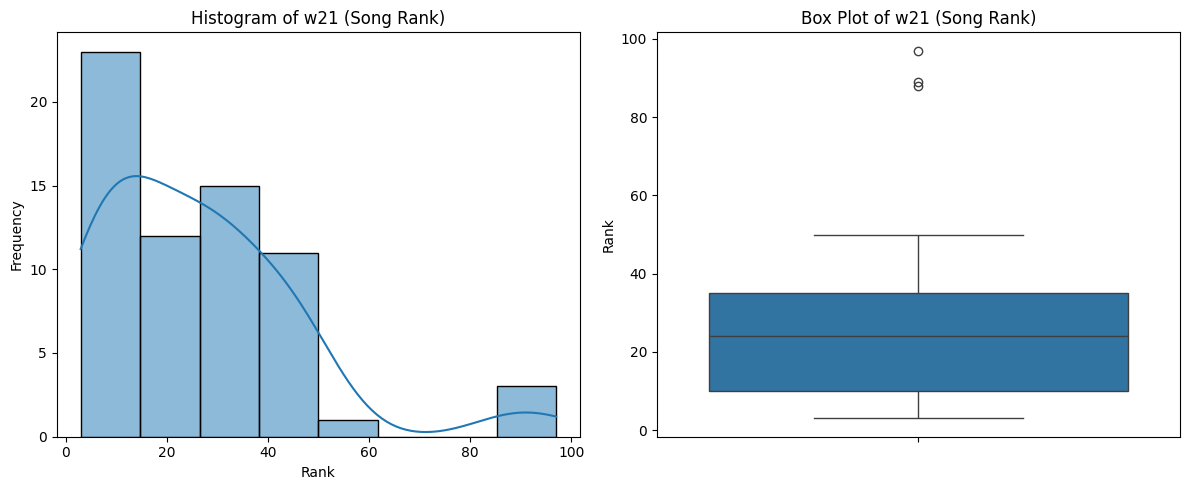

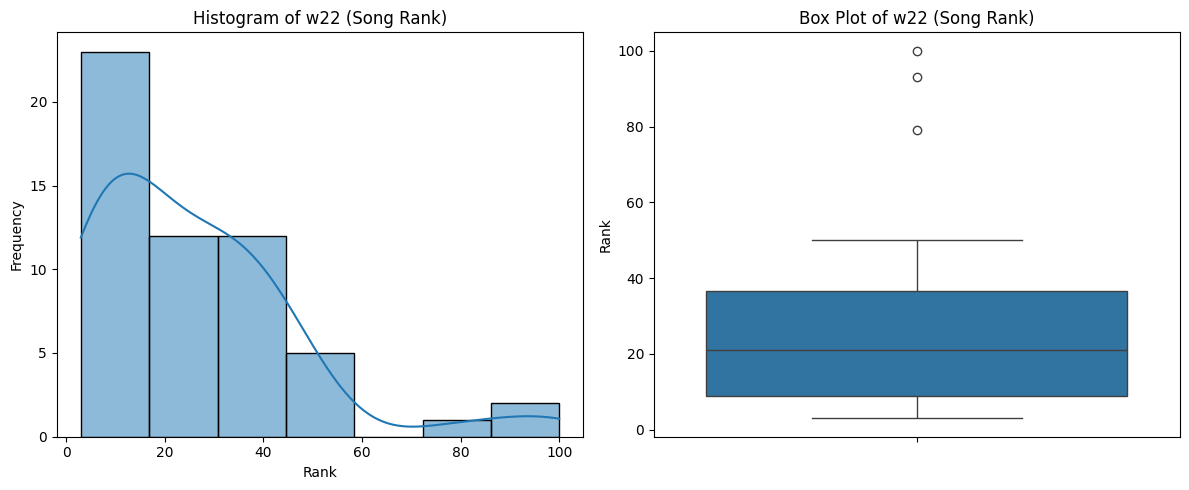

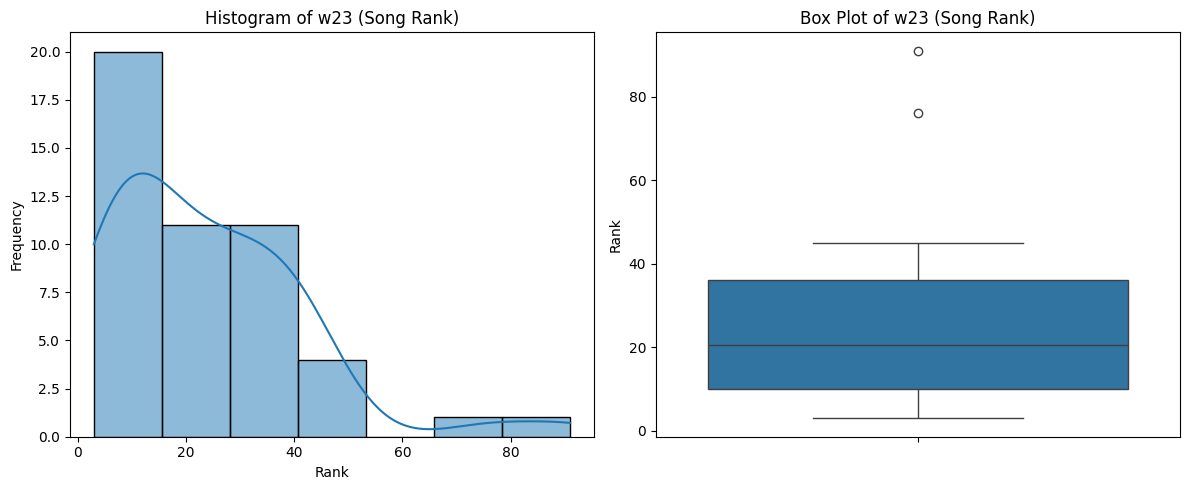

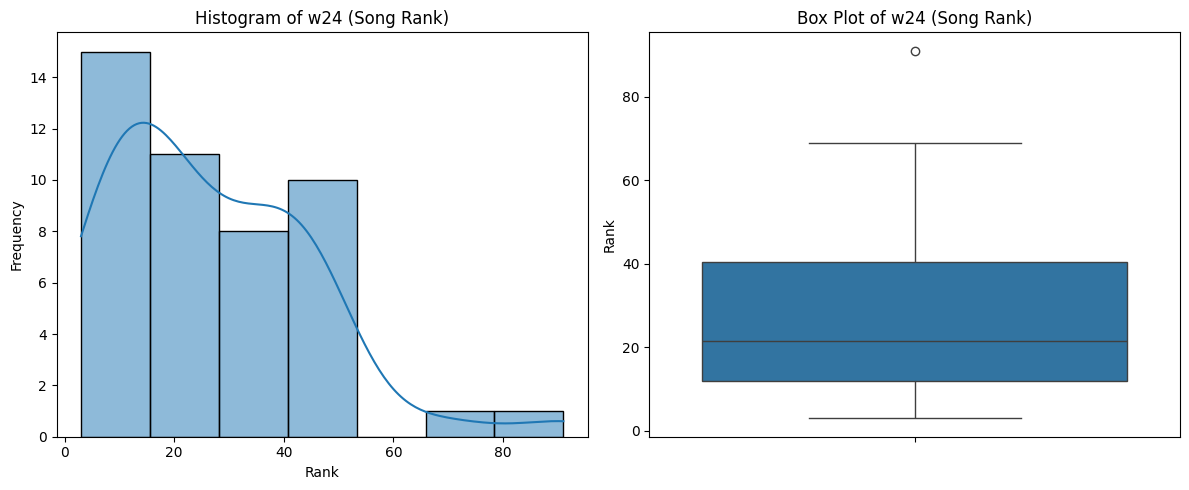

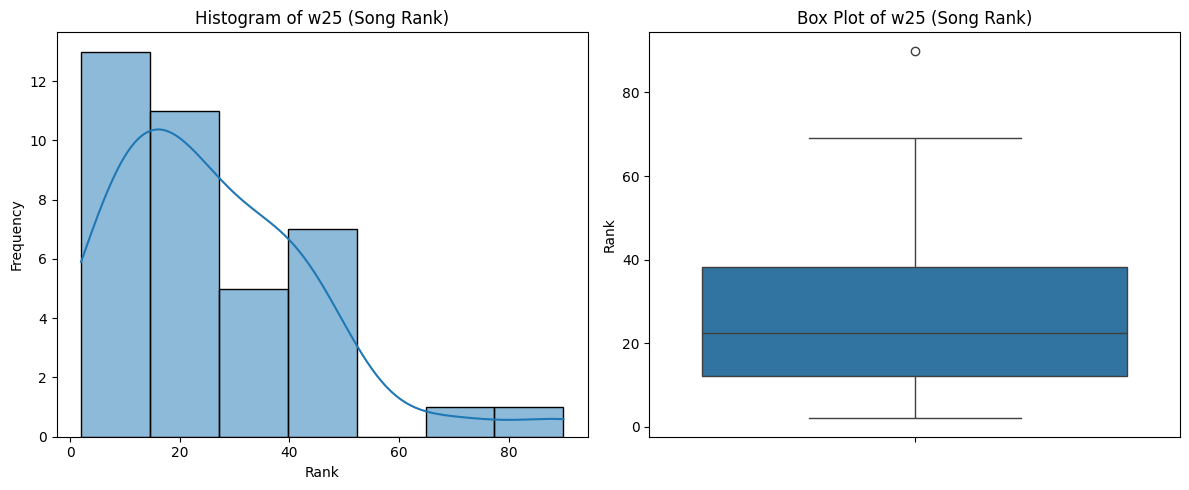

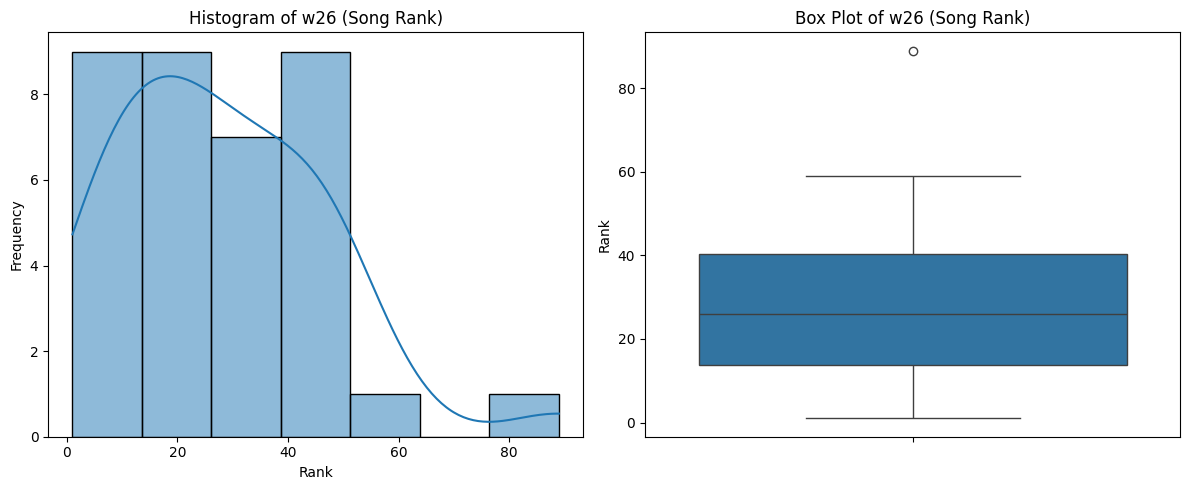

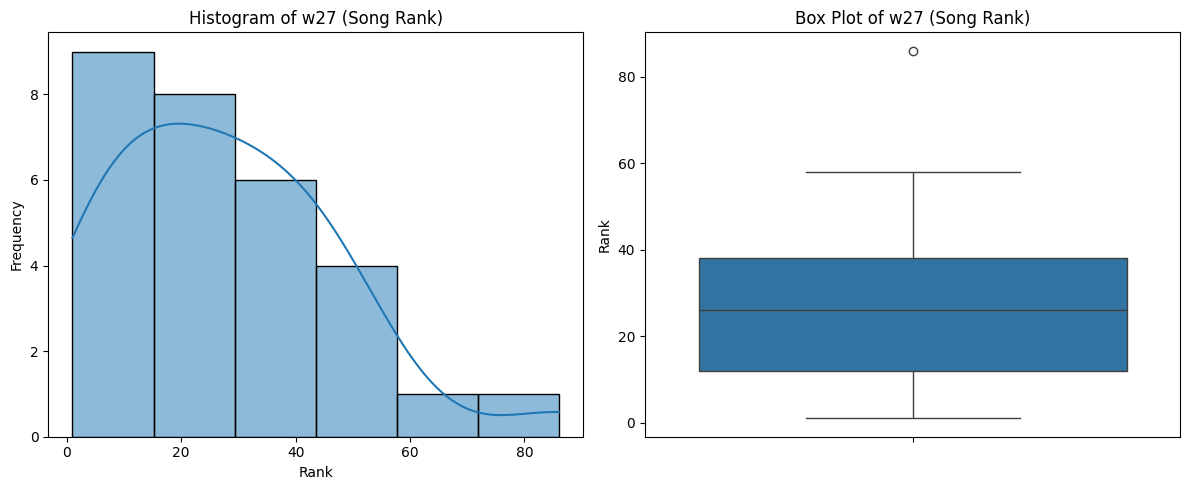

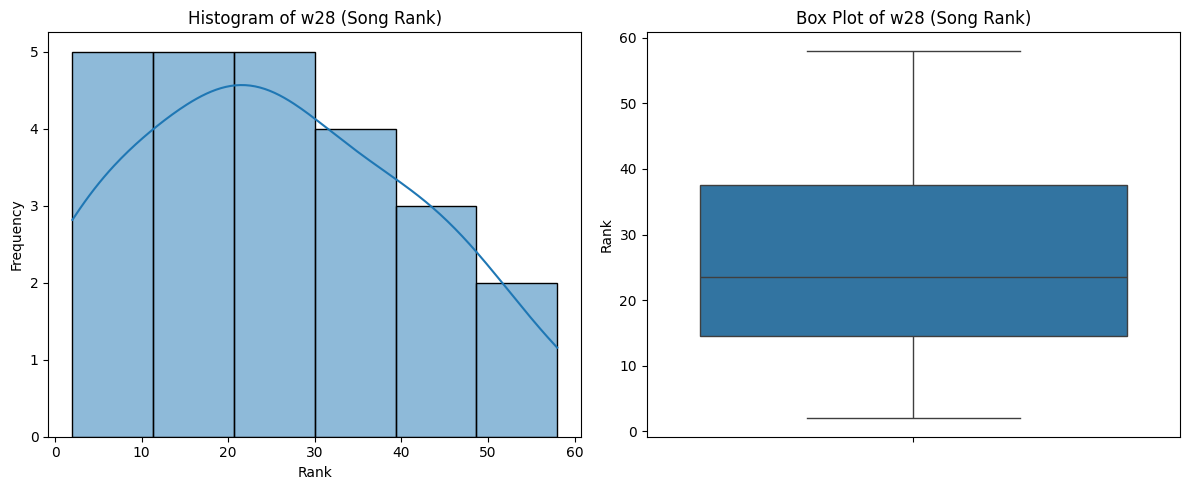

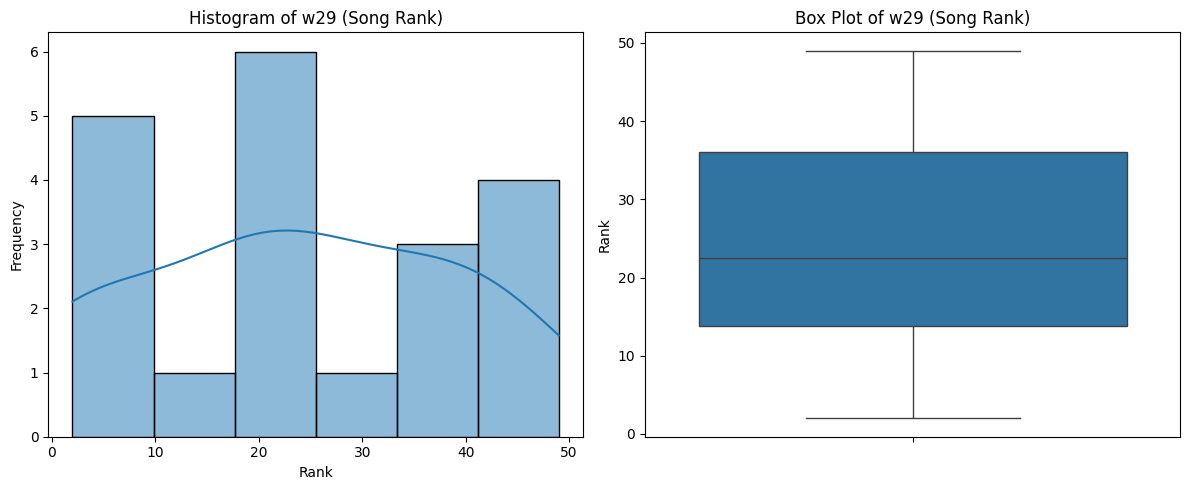

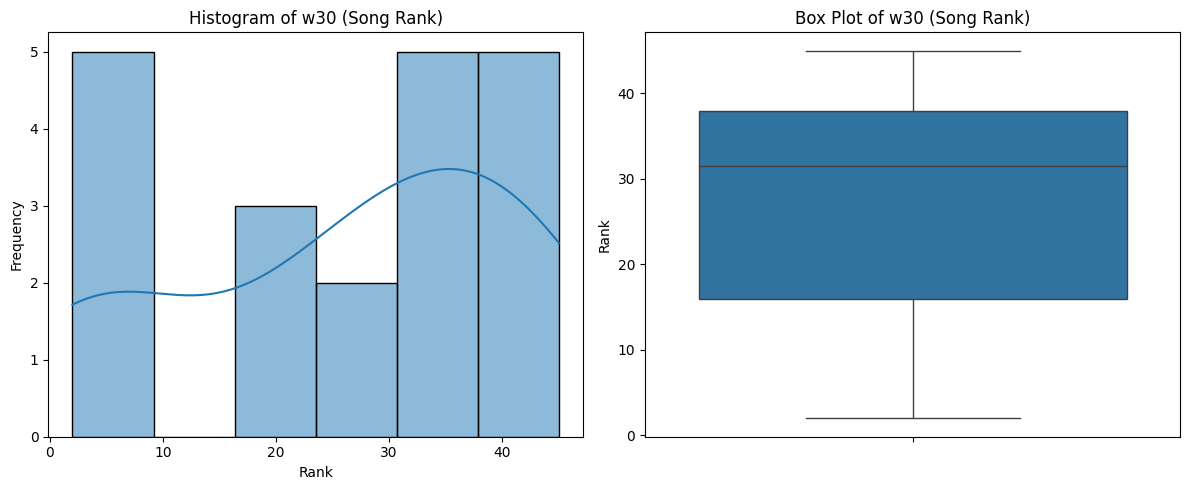

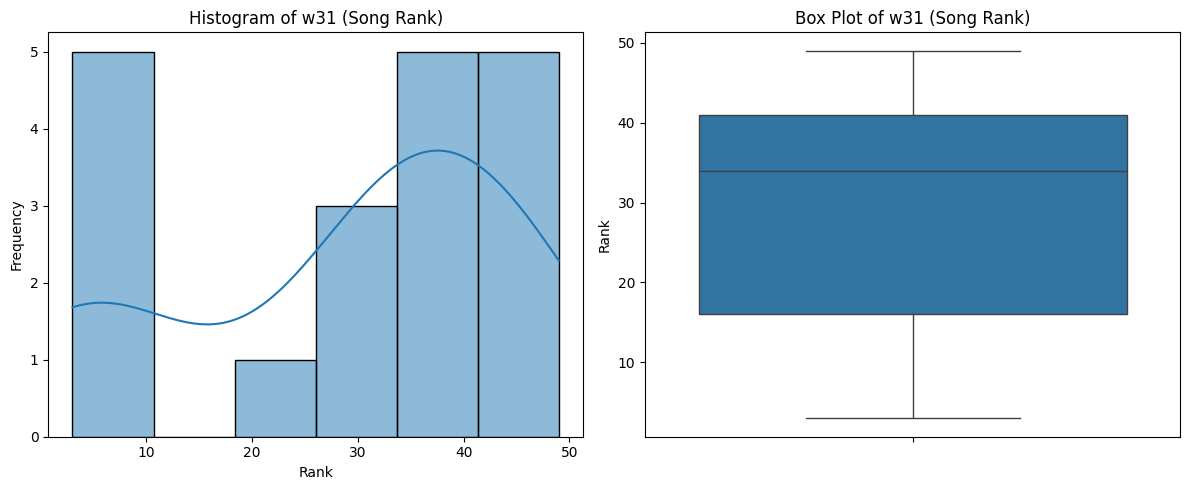

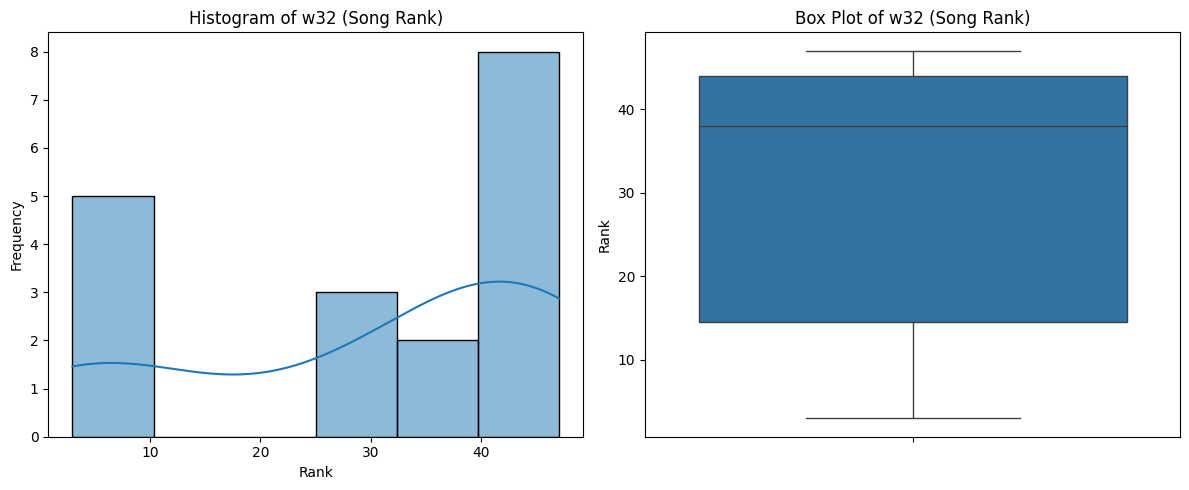

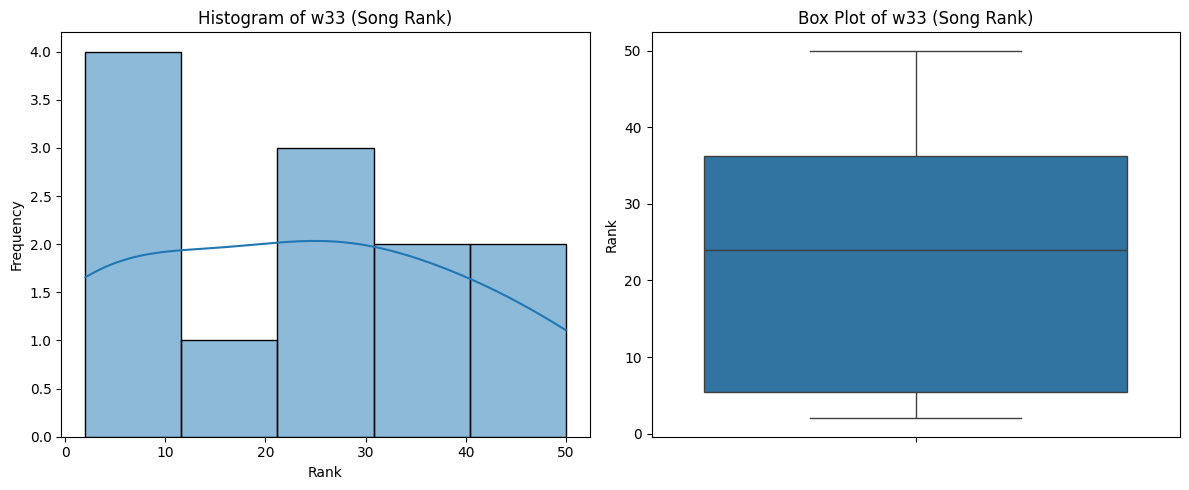

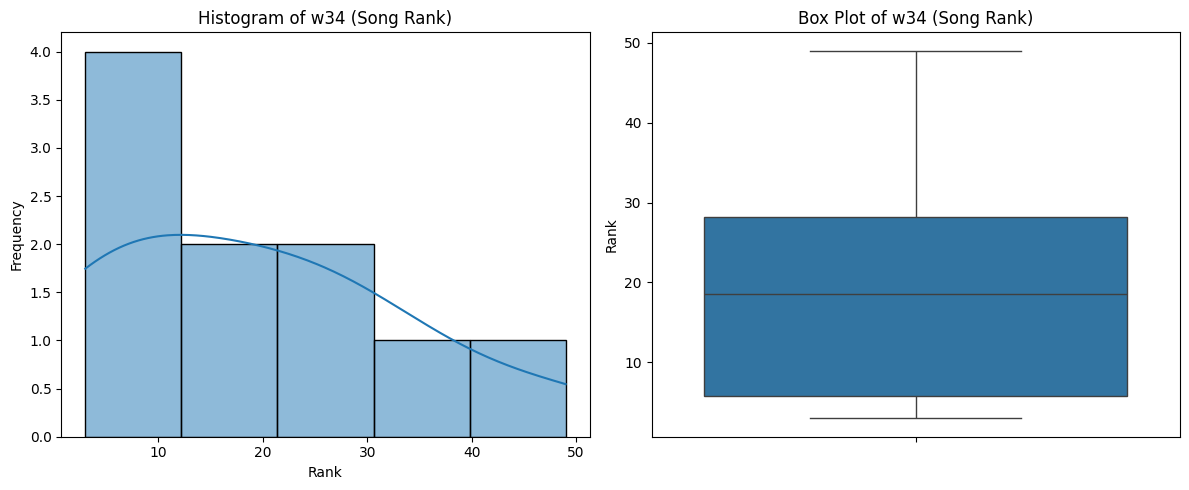

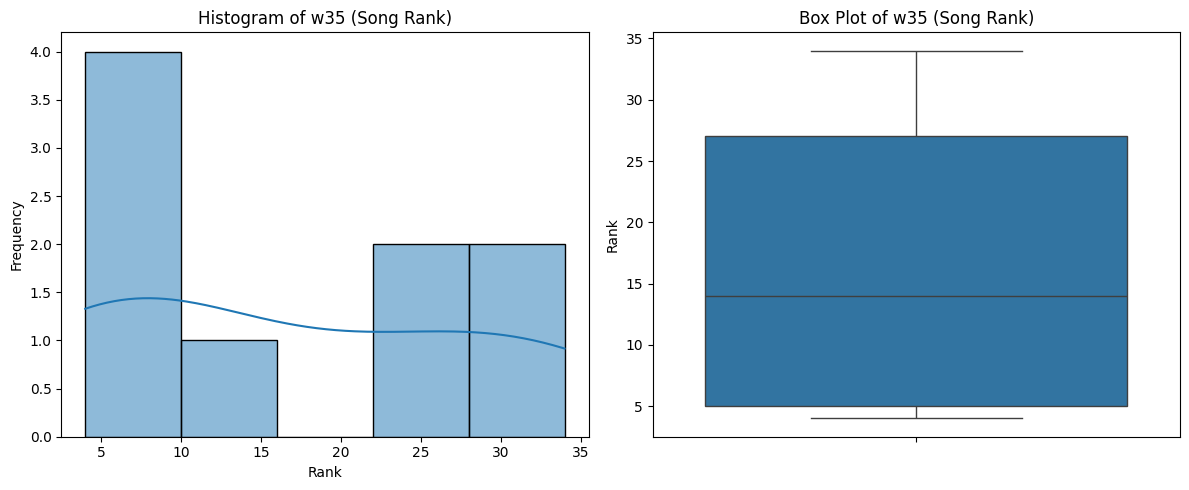

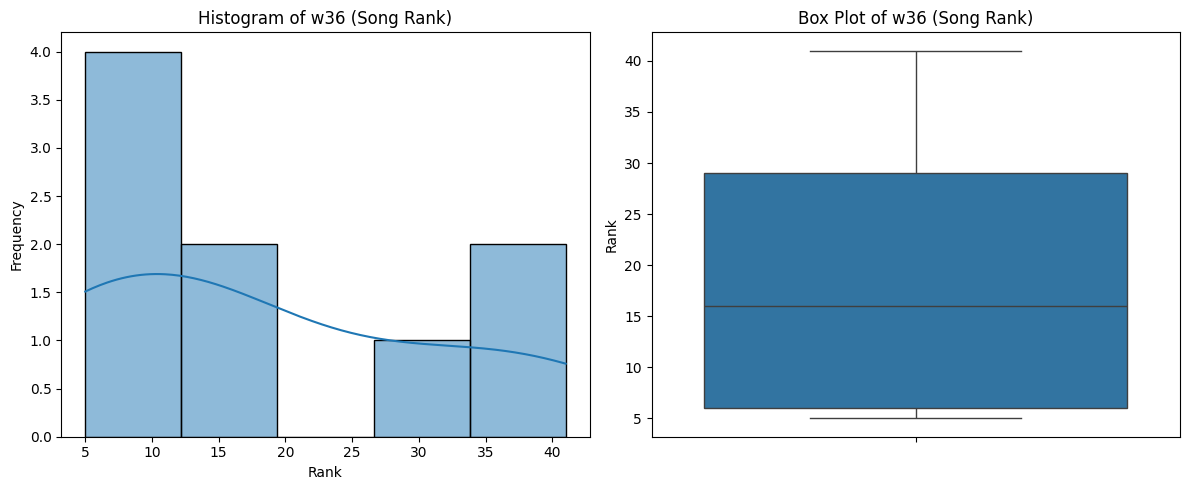

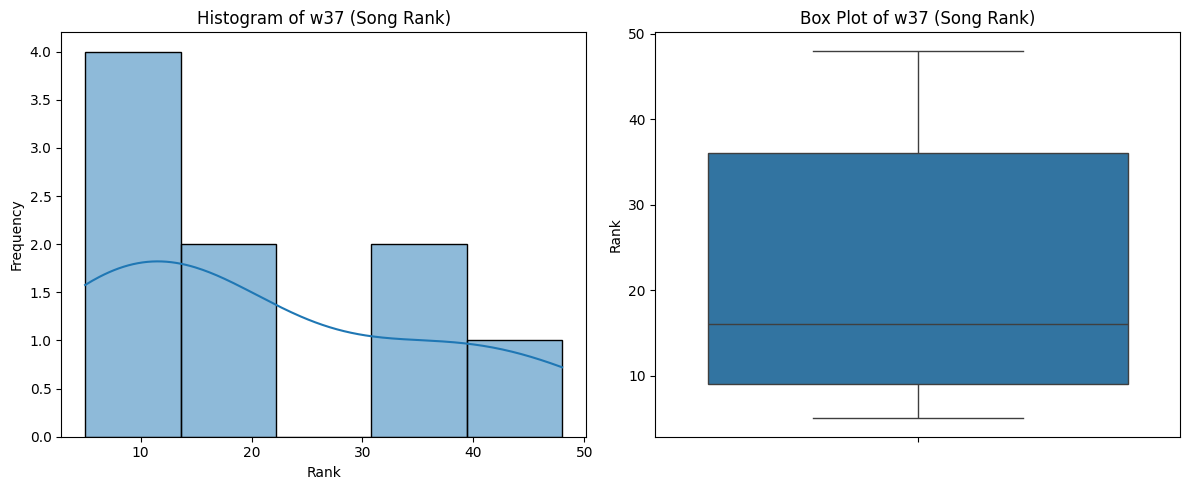

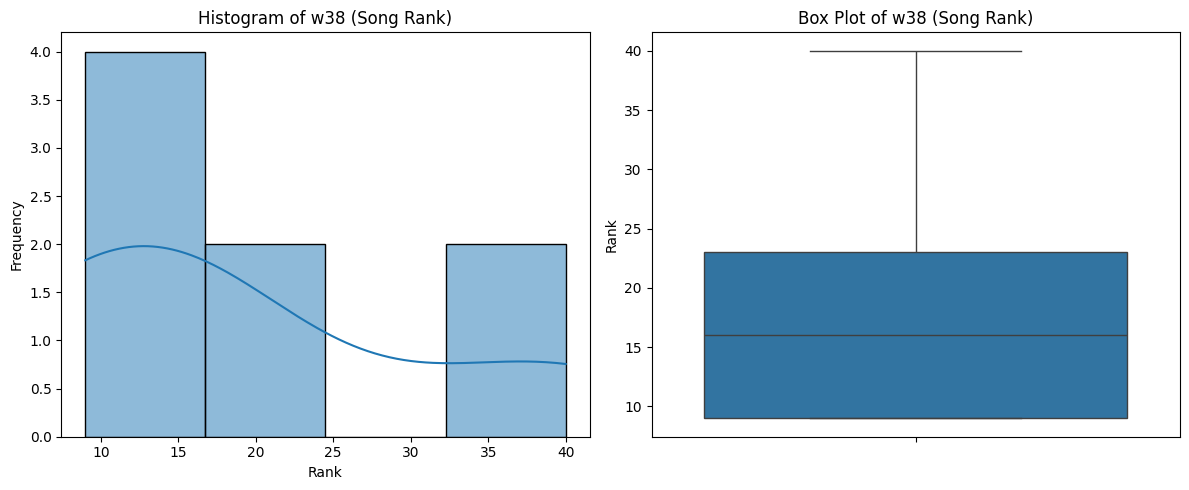

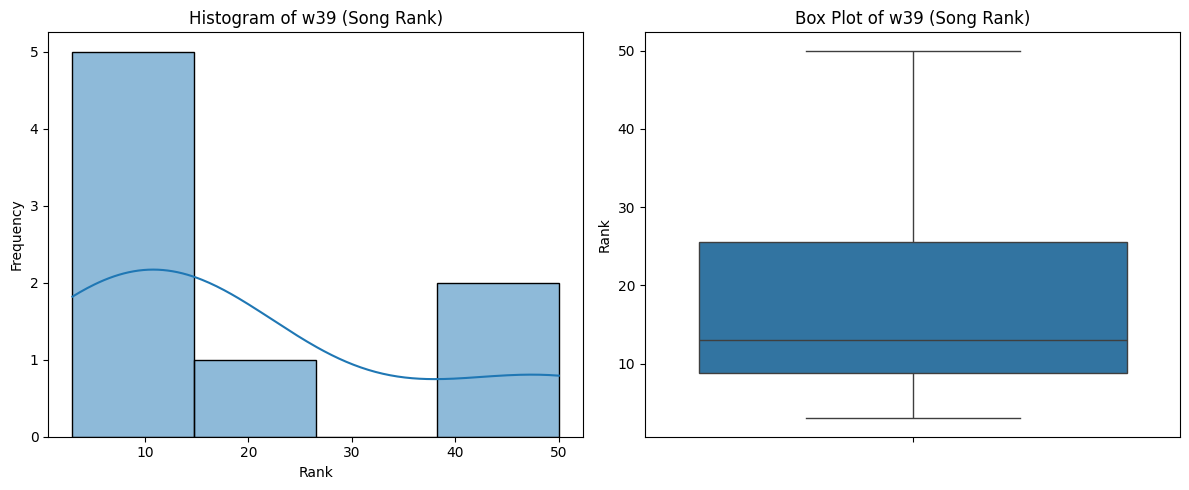

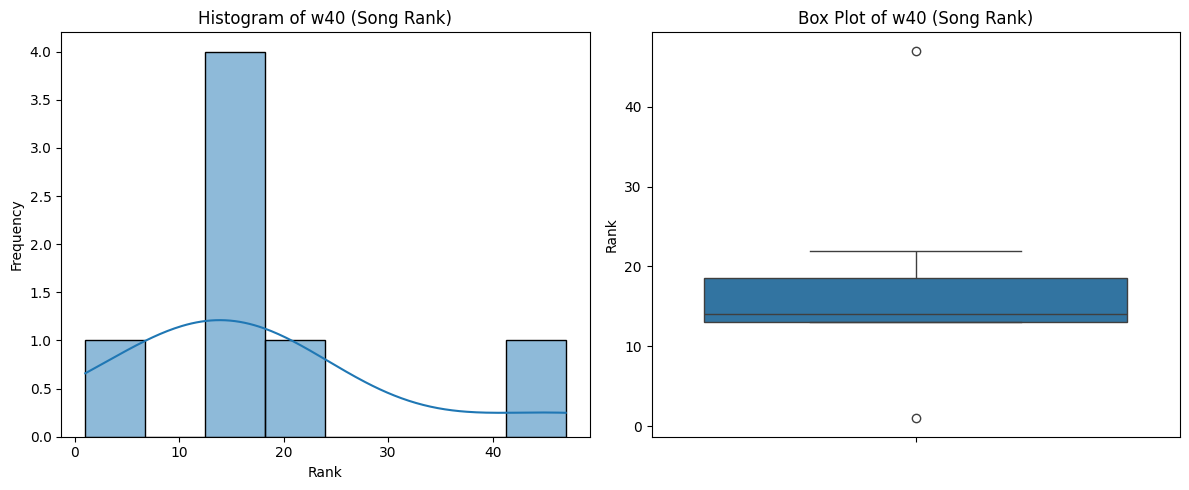

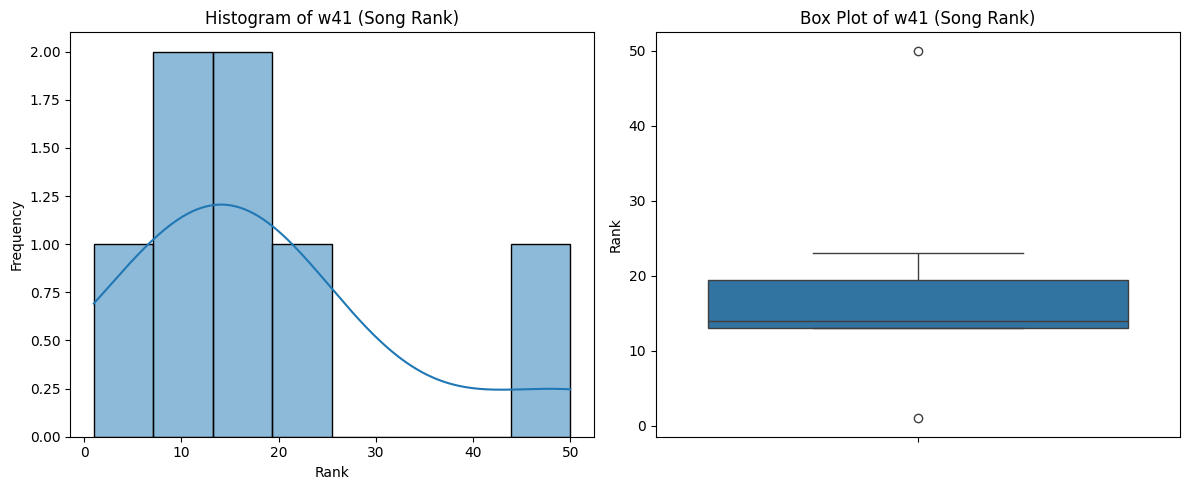

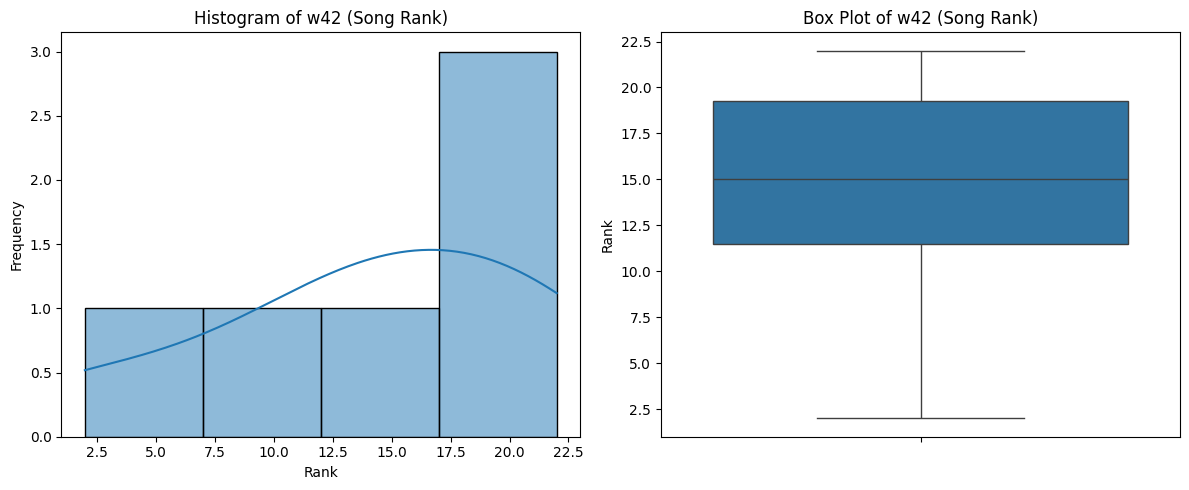

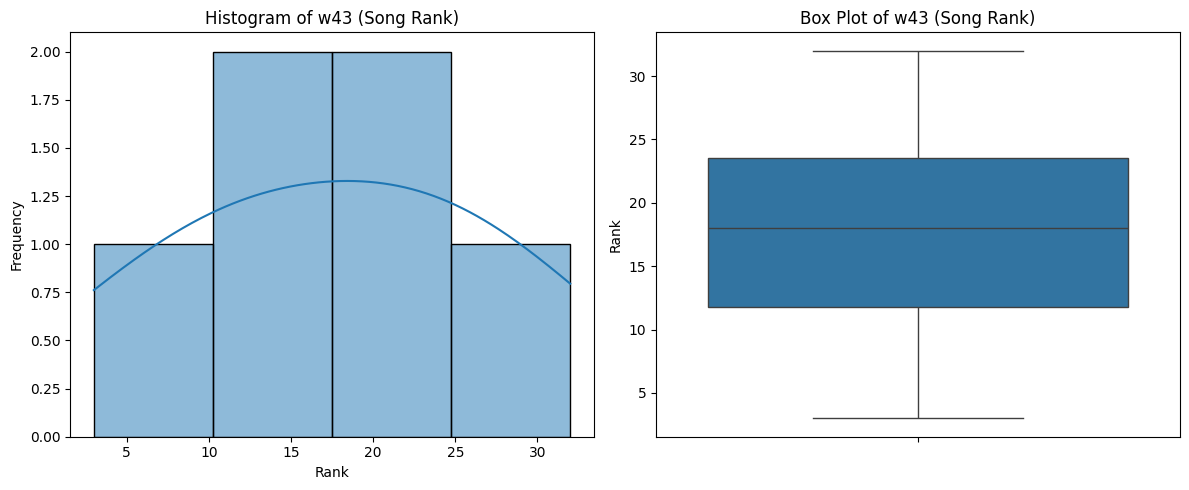

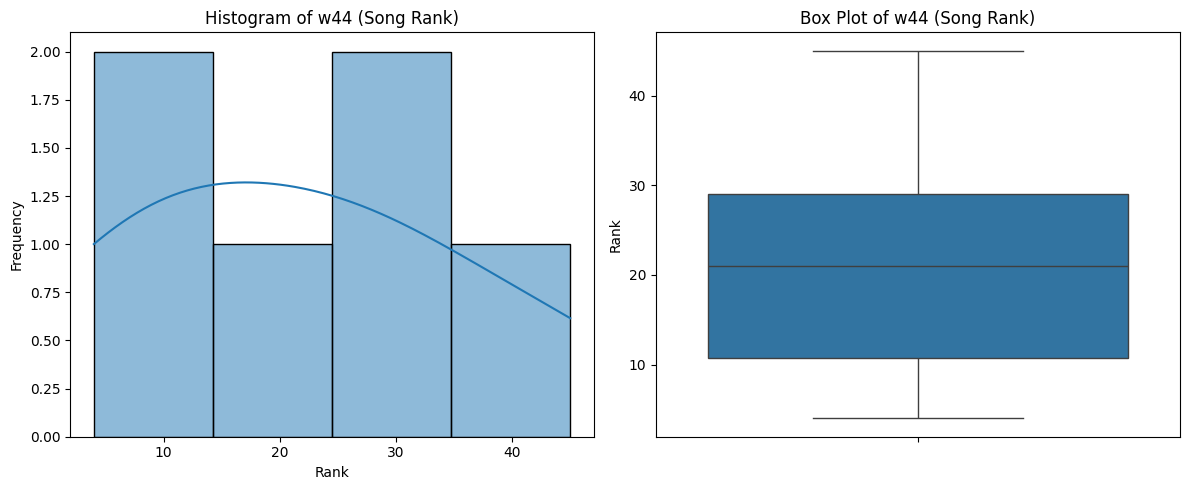

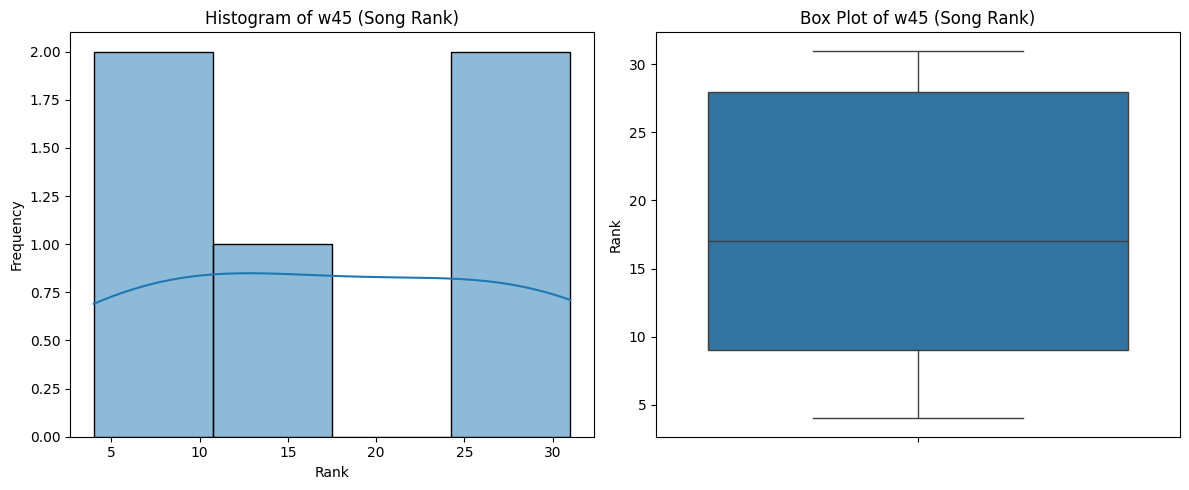

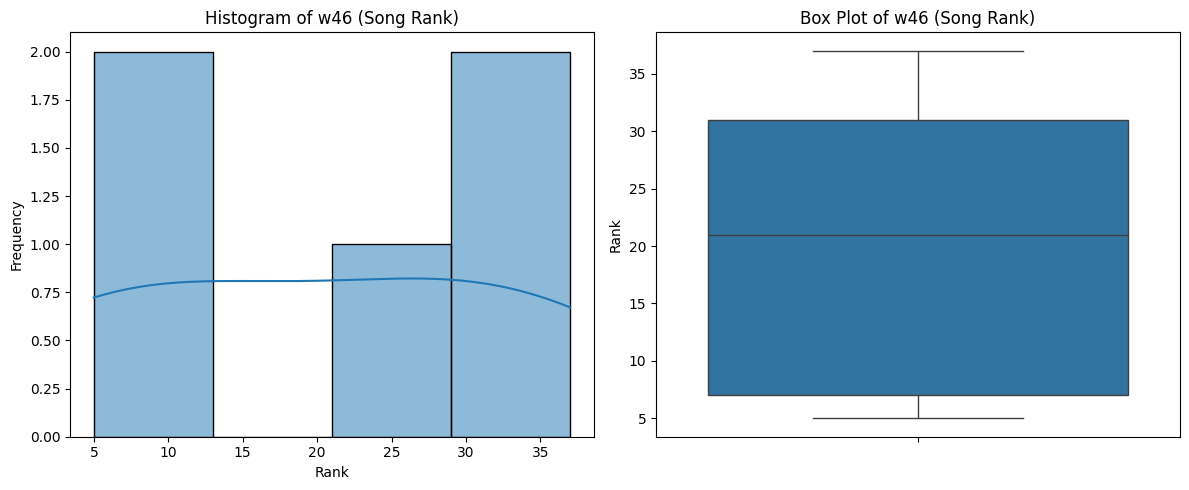

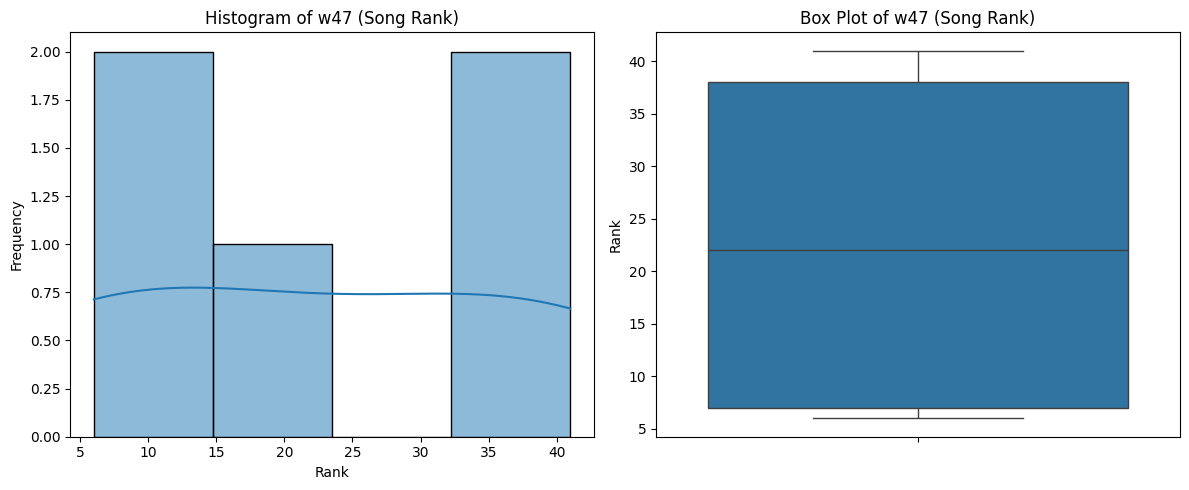

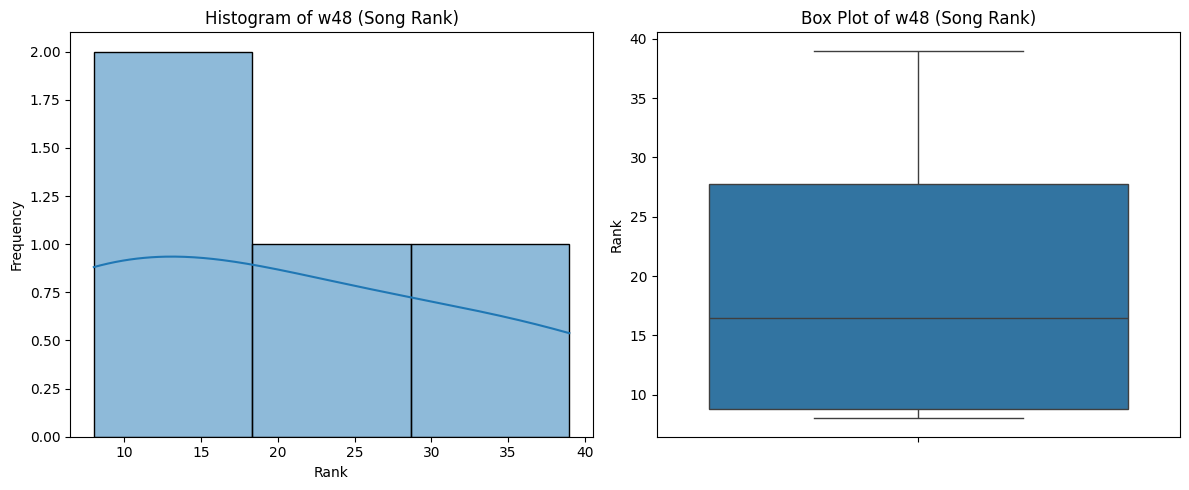

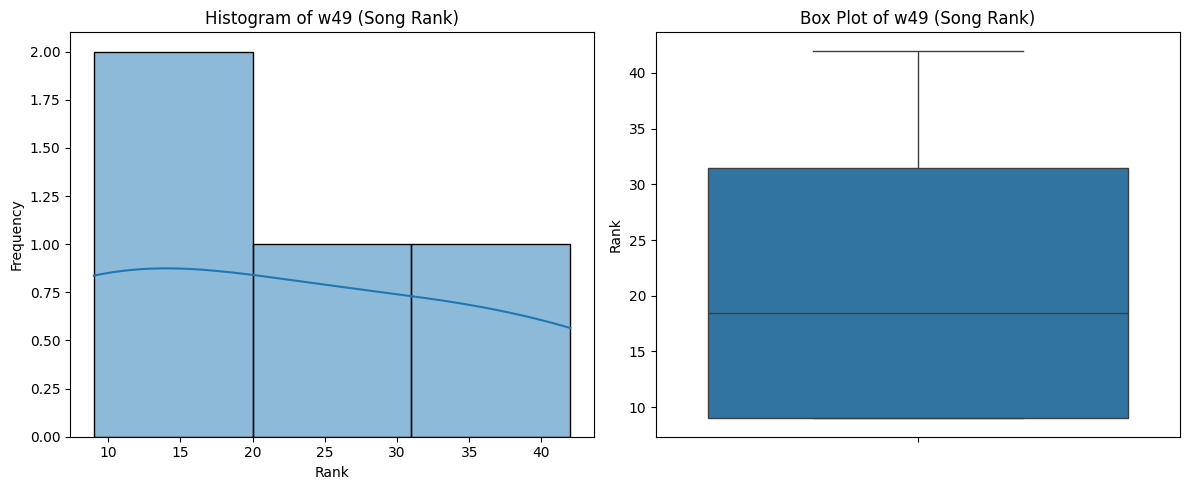

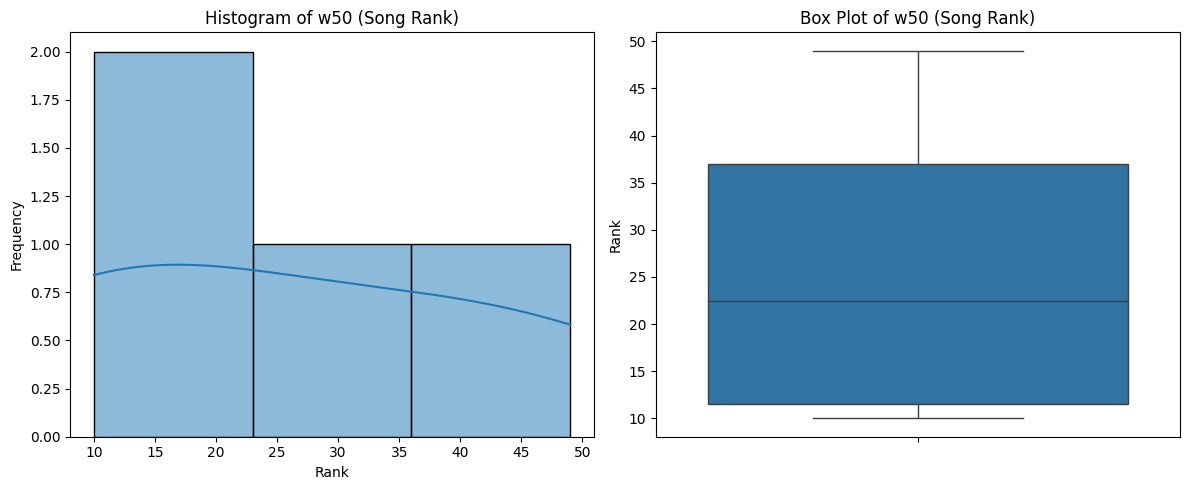

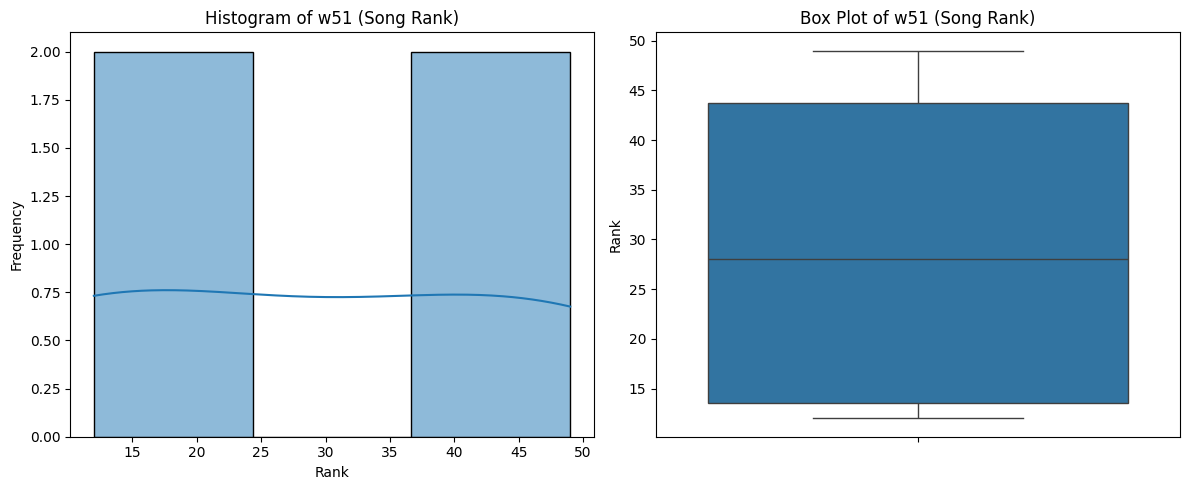

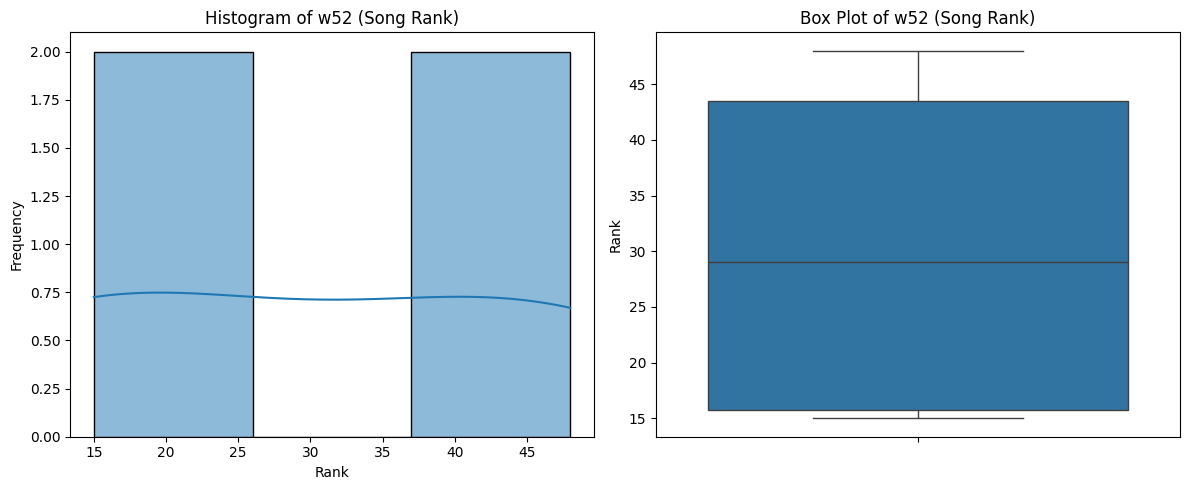

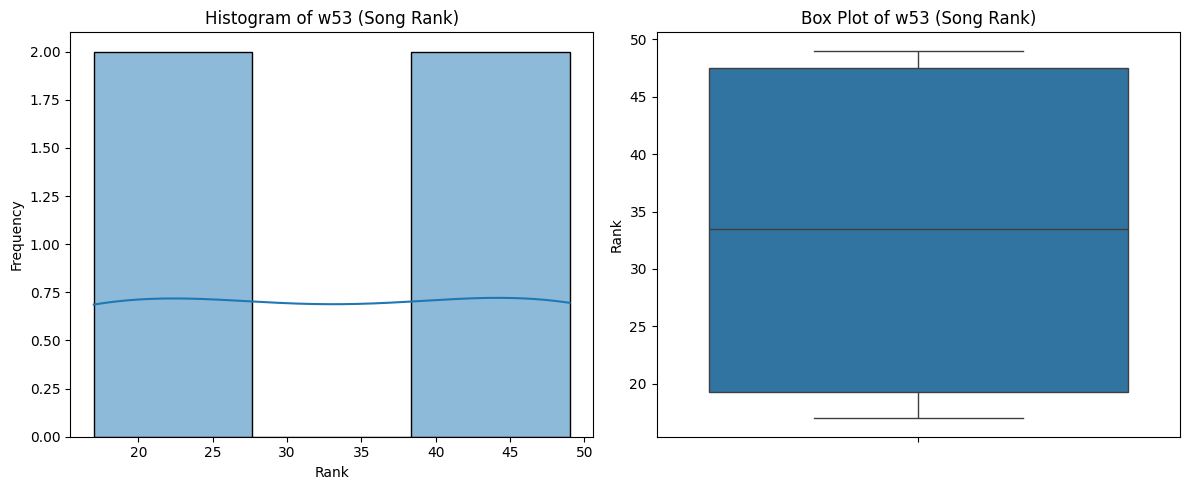

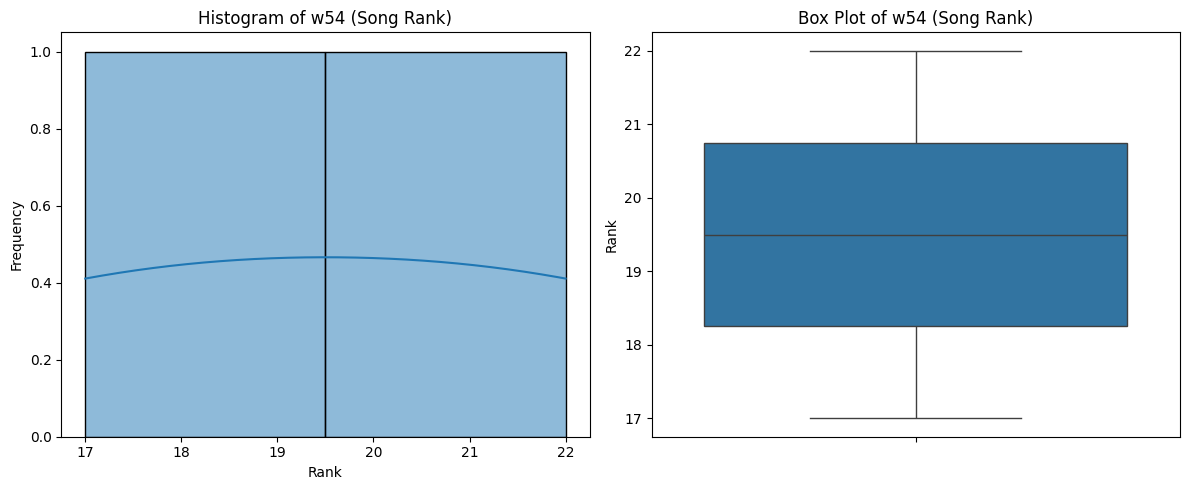

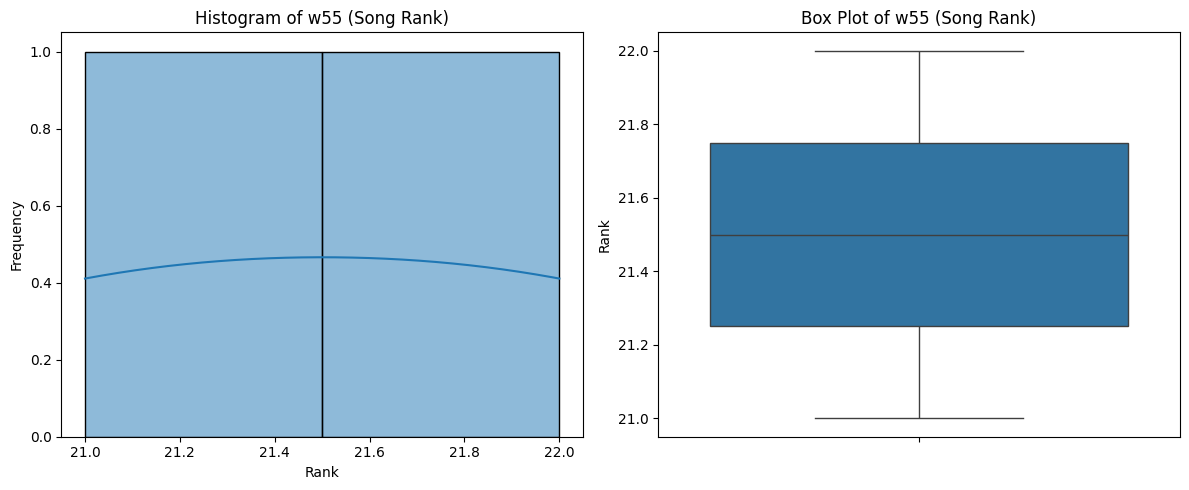

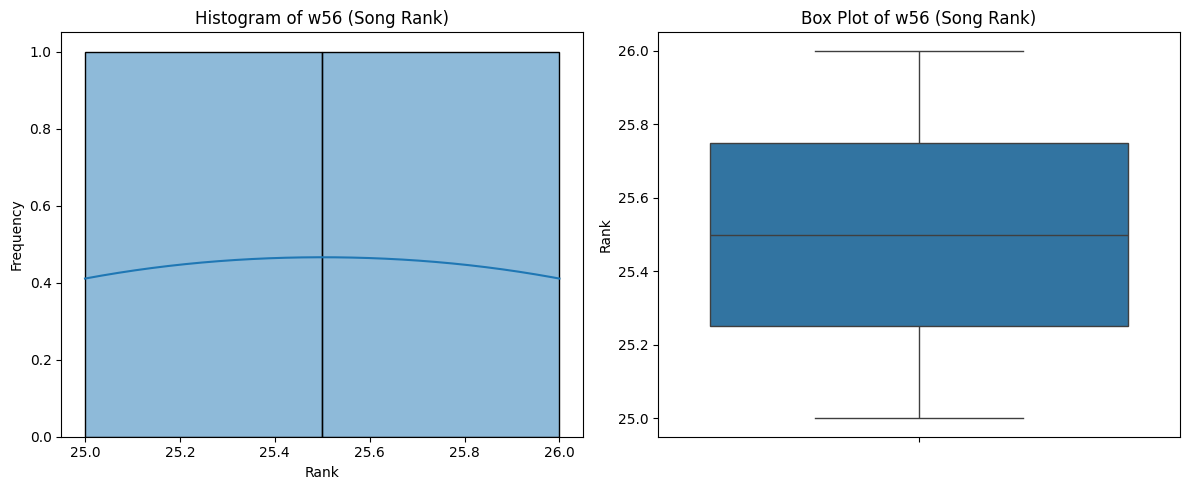

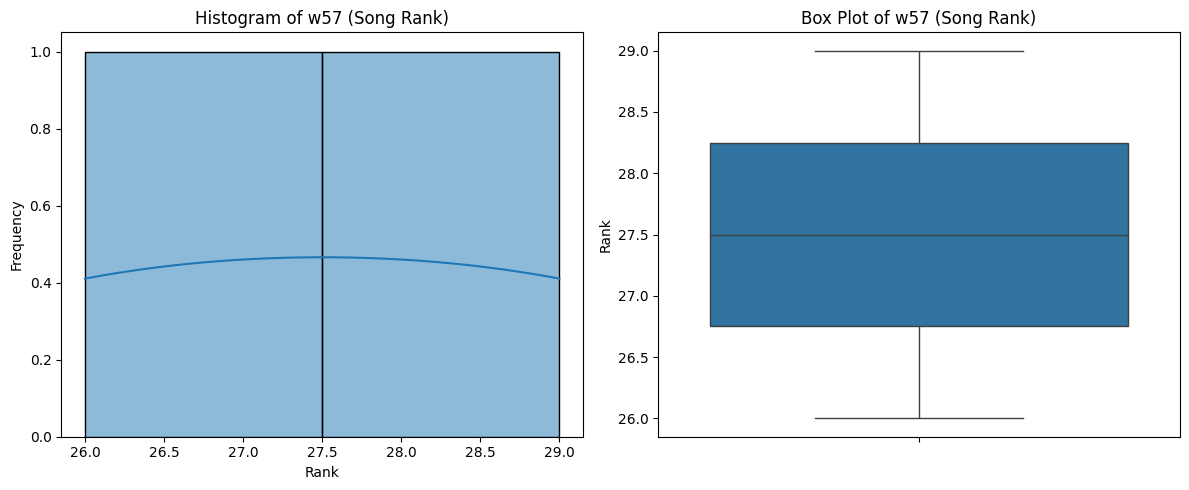

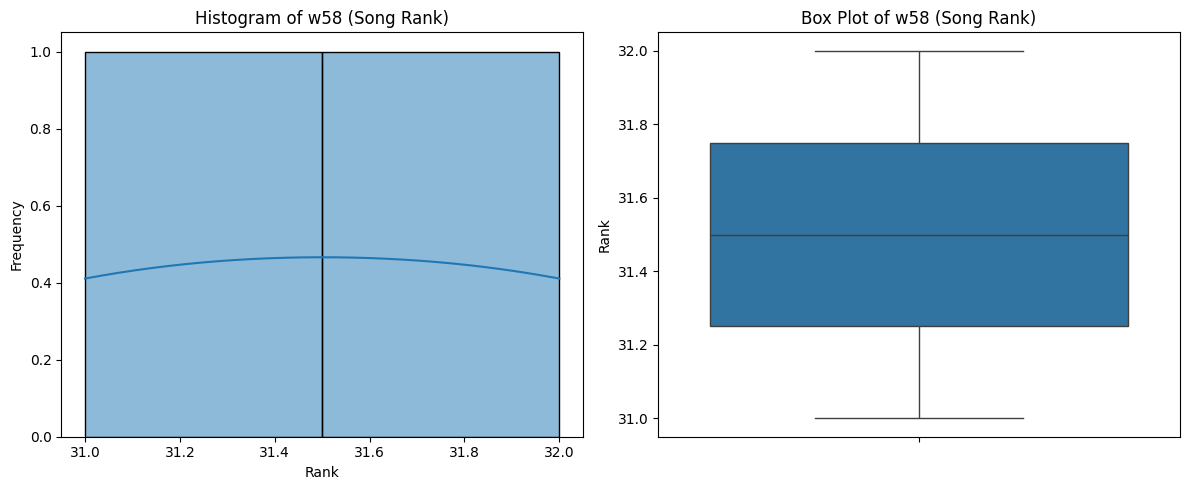

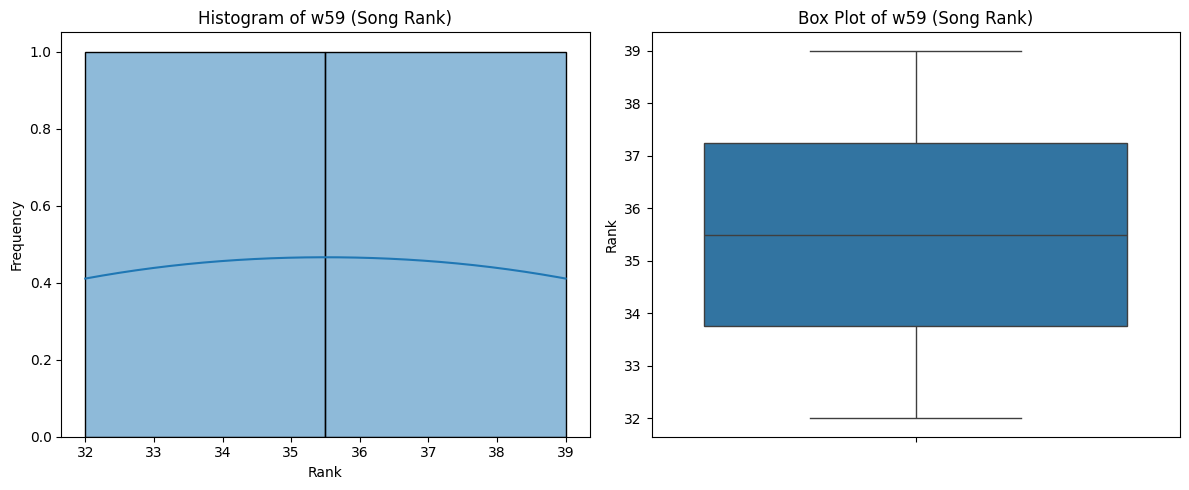

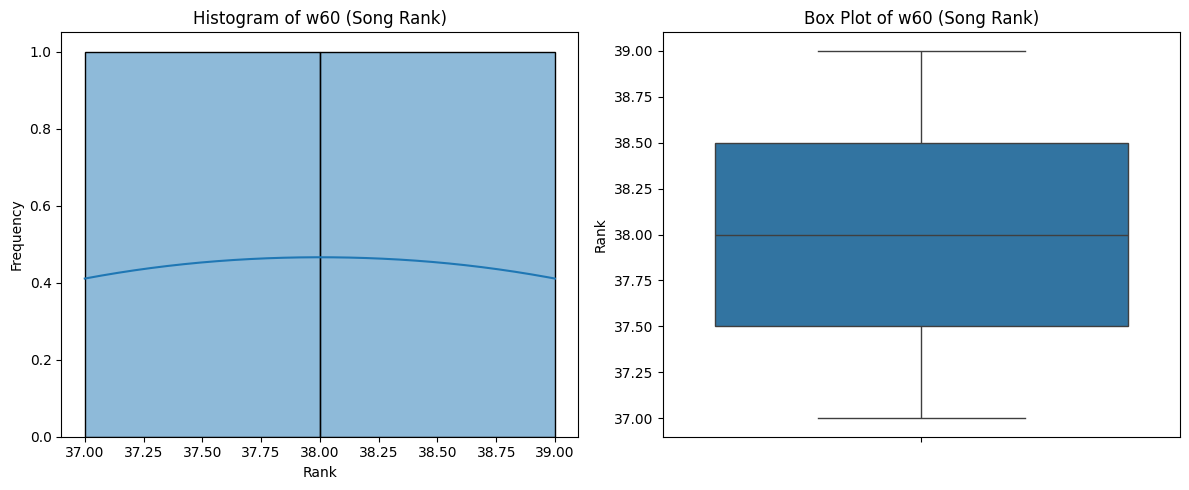

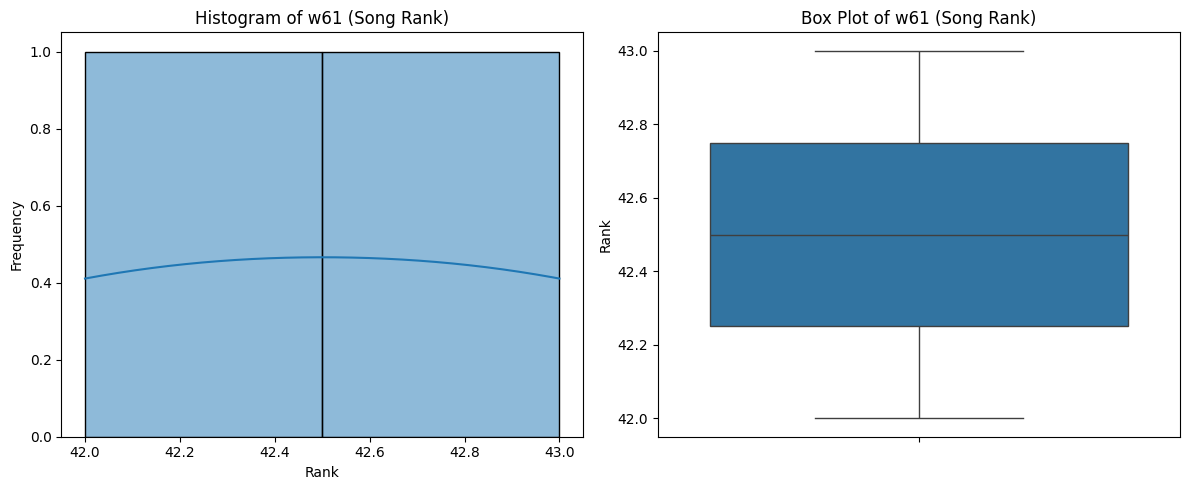

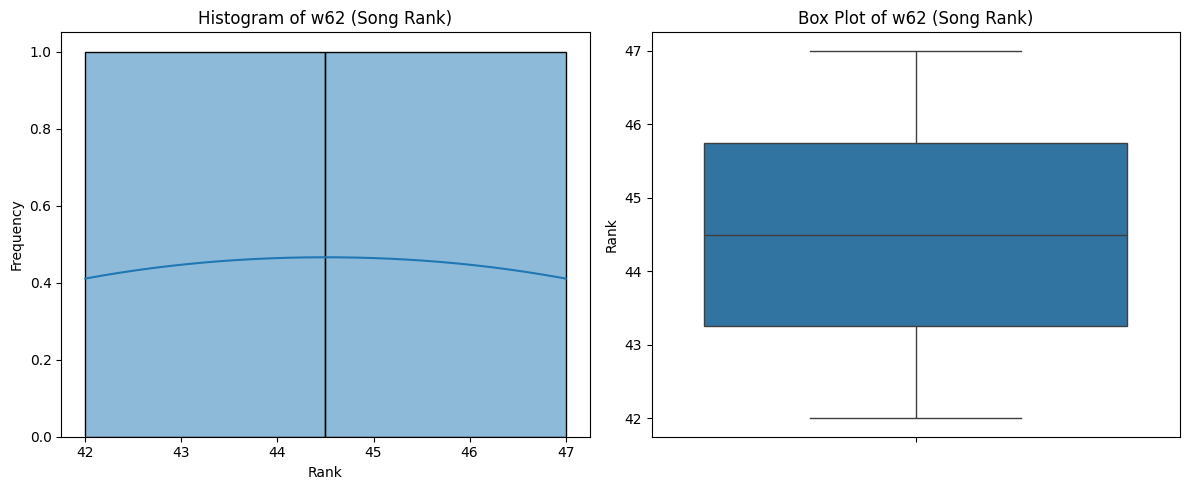

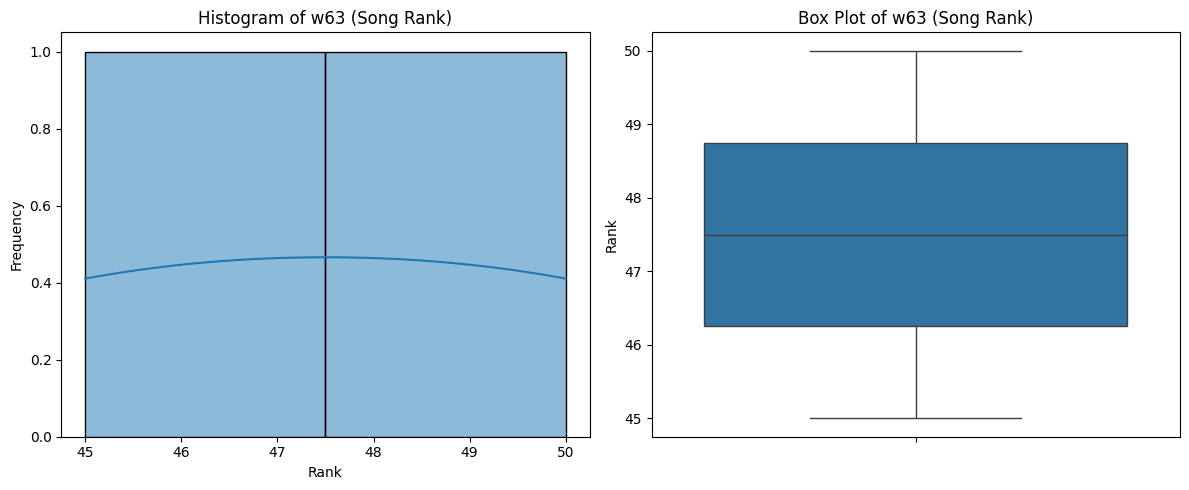

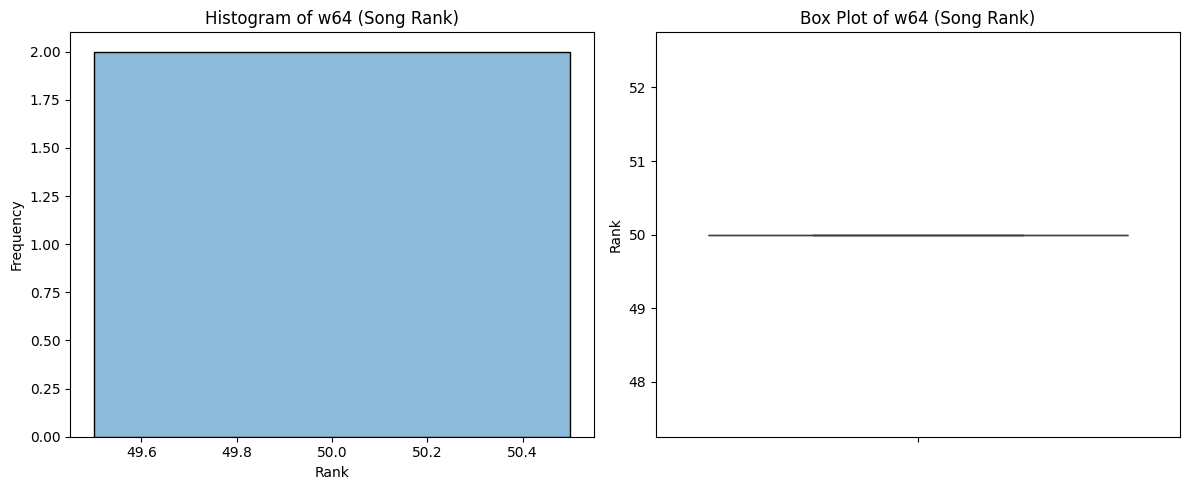

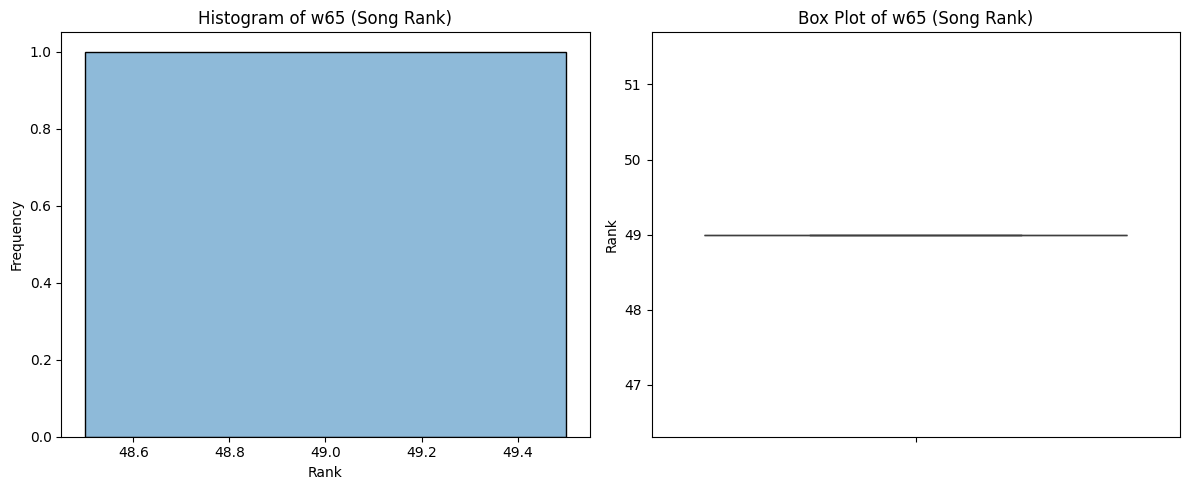

In [13]:
#Creating a loop - With Support from Google Gemini - The plots show the song rankings as it relates to the ferquency of ranking. 

w_columns = [col for col in bb_df_cl_cols.columns if col.startswith('w')]

for col in w_columns:
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns of subplots

    # Plot Histogram
    sns.histplot(bb_df_cl_cols[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col} (Song Rank)')
    axes[0].set_xlabel('Rank')
    axes[0].set_ylabel('Frequency')

    # Plot Box Plot
    sns.boxplot(y=bb_df_cl_cols[col].dropna(), ax=axes[1])
    axes[1].set_title(f'Box Plot of {col} (Song Rank)')
    axes[1].set_ylabel('Rank')

    plt.tight_layout() # Adjust subplot parameters for a tight layout
    plt.show() # Display the plots for the current column



---



---



---



2. (total 4 points)Chapter 3 [Hands-On Data Preprocessing in Python](https://www.packtpub.com/product/hands-on-data-preprocessing-in-python/9781801072137)

##### Excercise 4

For this exercise, we are going to use fatal-police-shootings-data.csv. There are a lot of debates, discussions, dialogues, and protests happening in the US surrounding police killings. The Washington Post has been collecting data on all fatal police shootings in the US. The dataset available to the government and the public alike has date, age, gender, race, location, and other situational information of these fatal police shootings. You can read more about this data on https://www.washingtonpost.com/graphics/investigations/police-shootings-database/, and you can download the last version of the data from https://github.com/washingtonpost/data-police-shootings


In [14]:
import pandas as pd

incident_df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Data-Preprocessing-in-Python/main/Chapter03/fatal-police-shootings-data.csv')
incident_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,6624,William Ice,2021-02-20,shot,gun,38.0,M,W,Lonoke,AR,False,attack,Car,False,NaN,NaN,True
6064,6626,Hailey Stainbrook,2021-02-20,shot,gun,30.0,F,W,Lincoln,NE,False,attack,Car,False,-96.643,40.893,True
6065,6625,NaN,2021-02-21,shot,gun,NaN,M,NaN,Braham,MN,False,attack,Other,False,NaN,NaN,True
6066,6628,NaN,2021-02-21,shot,undetermined,NaN,M,NaN,Anoka,MN,False,other,Other,False,-93.387,45.198,True


    a)	(1 point) What is the best definition of the data object for this dataset?

In [15]:
#Utlizing info to show the datatypes - bool(3), float64(3), int64(1), object(10). The objective is fir the Washing
incident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6068 non-null   int64  
 1   name                     5850 non-null   object 
 2   date                     6068 non-null   object 
 3   manner_of_death          6068 non-null   object 
 4   armed                    5860 non-null   object 
 5   age                      5802 non-null   float64
 6   gender                   6067 non-null   object 
 7   race                     5479 non-null   object 
 8   city                     6068 non-null   object 
 9   state                    6068 non-null   object 
 10  signs_of_mental_illness  6068 non-null   bool   
 11  threat_level             6068 non-null   object 
 12  flee                     5726 non-null   object 
 13  body_camera              6068 non-null   bool   
 14  longitude               

    b)	(1 point)Are there any attributes in the data that only have one value? Use .unique() function to check. If there are remove them from the data and update the definition of the data object.
    

In [16]:
#Showing the unique values below - Test 1
incident_df.nunique()

id                         6068
name                       5832
date                       2083
manner_of_death               2
armed                        98
age                          78
gender                        2
race                          6
city                       2673
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
longitude                  5118
latitude                   4634
is_geocoding_exact            2
dtype: int64

In [17]:
#Showing the unique values below - Test 2 - Looks as thought there aren't any unique values
single_value_cols = incident_df.columns[incident_df.nunique() <= 1].tolist()
single_value_cols

[]

    c)	(1 point) What type of values do the remaining attributes carry?
   

In [18]:
# Showing the attributes
incident_df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

    d)	(1 point)Compare the statistical information of the numerical attributes and see if any of them are a candidate for data redundancy. (hint you need to find corolation on numerical attribiutes)

In [19]:
# This question is beyond my level of understanding 



---



---



---



**3**. (total 1 points)Chapter 4 [Hands-On Data Preprocessing in Python](https://www.packtpub.com/product/hands-on-data-preprocessing-in-python/9781801072137)

##### Excercise 1
(1 point)In your own words, describe the difference between a dataset and a database.  


In [20]:
#A database is a source where any variety of data can be aggreggated, and a dataset is a specific to defined data that can be collated for analysis and is derived from a data source.



---



---



---



4. (total 2 points)Chapter 7 [Business Analytics, 2nd Edition](https://www.mheducation.com/highered/product/business-analytics-lertwachara-chen/M9781264302802.html)

##### Excercise 7.1

1. Using data from 50 workers, a researcher estimate

$$ \text{Wage} = b_0 + b_1 \text{Education} + b_2 \text{Experience} + b_3 \text{Age}  $$
where Wage is the hourly wage rate and Education, Experience, and Age are the years of higher education, the years of experience, and the age of the worker, respecttively. A portion of regression result is shown in the follwing table.

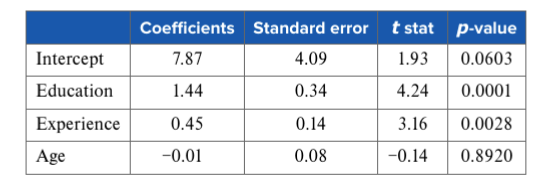

    a)    (1point) what are the estimate for b1, b2

In [21]:
#Showing regression results for b1 and b2
data = {
    'Coefficient': [7.87, 1.44, 0.45, -0.01],
    'Standard error': [4.09, 0.34, 0.14, 0.08],
    't stat': [1.93, 4.24, 3.16, -0.14],
    'p-value': [0.0603, 0.0001, 0.0028, 0.8920]
}

index = ['Intercept', 'Education', 'Experience', 'Age']

regression_results_df = pd.DataFrame(data, index=index)

b1_estimate = regression_results_df.loc['Education', 'Coefficient']
b2_estimate = regression_results_df.loc['Experience', 'Coefficient']

b1_estimate, b2_estimate

(np.float64(1.44), np.float64(0.45))

    b)    (1point) Predict the hourly wage rate for 30-year-old worker with four year of higher education and three years of experience.

In [22]:
# Solving using support from Gemini

# Extract coefficients from the DataFrame
b0 = regression_results_df.loc['Intercept', 'Coefficient']
b1 = regression_results_df.loc['Education', 'Coefficient']
b2 = regression_results_df.loc['Experience', 'Coefficient']
b3 = regression_results_df.loc['Age', 'Coefficient']

# Define the worker's characteristics as given in the problem
education_years = 4
experience_years = 3
worker_age = 30

# Calculate the predicted hourly wage rate using the regression equation:
# Wage = b0 + b1 * Education + b2 * Experience + b3 * Age
predicted_wage = b0 + (b1 * education_years) + (b2 * experience_years) + (b3 * worker_age)

print(f"--- Predicted Hourly Wage Rate ---")
print(f"For a worker with:")
print(f"  - Education: {education_years} years")
print(f"  - Experience: {experience_years} years")
print(f"  - Age: {worker_age} years")
print(f"The predicted hourly wage rate is: ${predicted_wage:.2f}")

--- Predicted Hourly Wage Rate ---
For a worker with:
  - Education: 4 years
  - Experience: 3 years
  - Age: 30 years
The predicted hourly wage rate is: $14.68




---



---



---



5. (total 3 points)Chapter 7 [Business Analytics, 2nd Edition](https://www.mheducation.com/highered/product/business-analytics-lertwachara-chen/M9781264302802.html)

##### Excercise 7.1

6. The director of graduate admission at a large university is analyzing the relationship between scores on the math portion of Graduate Record Examination (GRE) and subsequent performace in graduate school, as measured by student`s avrage (GPA). the accompaanying data file shows GPA and GRE of 24 students.

In [23]:
import numpy as np
import pandas as pd
gpaDf = pd.read_excel("https://www.dropbox.com/scl/fi/24jfn2u4rsn6e45bvzkrs/GPA.xlsx?rlkey=9ecqtc90bmntcsucdy8gzyt24&dl=1")
gpaDf

,GPA,GRE
0,3.0,700
1,3.5,720
2,3.2,650
3,3.7,750
4,3.1,680
5,3.9,730
6,3.3,740
7,3.5,780
8,3.0,690
9,3.5,730


    a) (2points) Find regression model equation for the model: GPA = b0 + B1 GRE

In [24]:
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm

# Utilizing our notes to find the solution - The results show that there is a strong multicolinearity

gpaDfLinearRegressionModel = sm.OLS(
 gpaDf["GPA"],
  sm.add_constant(gpaDf["GRE"])
)

gpaDfLinearRegressionModel = gpaDfLinearRegressionModel.fit()

gpaDfLinearRegressionModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     8.316
Date:                Tue, 24 Jun 2025   Prob (F-statistic):            0.00862
Time:                        20:04:21   Log-Likelihood:               -0.29776
No. Observations:                  24   AIC:                             4.596
Df Residuals:                      22   BIC:                             6.952
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4256      1.024      0.416      0.682      -1.698       2.549
GRE            0.0041      0.001      2.884      0.009       0.001       0.007
==============================================================================
Omnibus:                        1.633   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.406
Skew:                           0.458   Prob(JB):                        0.495
Kurtosis:                       2.248   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    b) (1 point) what is a student`s prediction GPA if he/she scored 710 on math portion of GRE

In [25]:
# Step 1 - Defining the predicted GPA
predictedgpa = gpaDfLinearRegressionModel.predict(sm.add_constant(gpaDf["GPA"]))
predictedgpa

0     0.438000
1     0.440063
2     0.438825
3     0.440888
4     0.438413
5     0.441713
6     0.439238
7     0.440063
8     0.438000
9     0.440063
10    0.438825
11    0.440888
12    0.438413
13    0.441713
14    0.439238
15    0.440063
16    0.437588
17    0.439238
18    0.439238
19    0.440475
20    0.438000
21    0.441300
22    0.438825
23    0.440063
dtype: float64

In [26]:
#Step 2 - Adding the predicted GPA column to the dataset
gpaDf['predictedgpa'] = predictedgpa
gpaDf

,GPA,GRE,predictedgpa
0,3.0,700,0.438000
1,3.5,720,0.440063
2,3.2,650,0.438825
3,3.7,750,0.440888
4,3.1,680,0.438413
5,3.9,730,0.441713
6,3.3,740,0.439238
7,3.5,780,0.440063
8,3.0,690,0.438000
9,3.5,730,0.440063


In [27]:
#Step 3 - Test the prediction with 710 - See result below
testPredict = gpaDfLinearRegressionModel.predict([[1,710]])
testPredict

array([3.354375])



---



---



---



6. (totla 3 points)Chapter 7 [Business Analytics, 2nd Edition](https://www.mheducation.com/highered/product/business-analytics-lertwachara-chen/M9781264302802.html)

##### Excercise 7.1

10. The maintenance manager at a trucking company wants to build a regression model to forcast the time unyil the first engine overhaul(Time in years) based on four predictor variables for 25 trucks:
    1. anual miles driven (Miles in 1000s)
    2. avrage load weight (Load in tons)
    3. average driving speed (Speed in mph)
    4. oil change interval (Oil in 1000s of miles).

In [28]:
import numpy as np
import pandas as pd
engineDf =  pd.read_excel("https://www.dropbox.com/scl/fi/dcoz9yw3f8yywtzy82f4z/Engine.xlsx?rlkey=n53hfjjsrddywktksj156jra5&dl=1")
engineDf.head()

,Time,Miles,Load,Speed,Oil
0,7.9,42.8,19,46,15
1,0.9,98.5,25,46,29
2,8.5,43.4,21,64,14
3,1.3,110.7,27,60,26
4,1.4,102.3,28,51,17


    a) (2 point)find model regression equation (use all four predictor variables)

In [29]:
# See results below
# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
engineDf.head()

engineRegModel1 = sm.OLS(
  engineDf["Time"],
  sm.add_constant(engineDf[["Miles", "Load", "Speed", "Oil"]])
)

engineRegModel1Fit = engineRegModel1.fit()
engineRegModel1Fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     50.47
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           3.58e-10
Time:                        20:04:23   Log-Likelihood:                -27.456
No. Observations:                  25   AIC:                             64.91
Df Residuals:                      20   BIC:                             71.01
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4343      2.192      6.128      0.000       8.861      18.008
Miles         -0.0896      0.012     -7.385      0.000      -0.115      -0.064
Load          -0.0732      0.091     -0.806      0.429      -0.262       0.116
Speed          0.0048      0.029      0.164      0.871      -0.056       0.065
Oil           -0.0297      0.039     -0.755      0.459      -0.112       0.052
==============================================================================
Omnibus:                        1.355   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                0.938
Skew:                           0.116   Prob(JB):                        0.626
Kurtosis:                       2.080   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    b) (1point) Predict the time before the first engine overhaul for particular truck driven 60000 miles per year with an average load of 22 tons, an average driving speed of 57 mph, and 18000 miles between oil changes.

In [30]:
# Your answer

### ✅ Extra 5 Points

To earn these additional points, make sure you:

- Register your model in the registry group using the format:  
  `<lastName>_<studentNumber>_<modelName>`
- Ensure the registered model includes:
  - A proper **transformer**
  - A working **main predictor**
- Confirm that the model can be called through the FastAPI `/dashboard` endpoint using the `predict` function.

> **Note:** These are bonus points that can contribute to improving your final course grade.


In [31]:
#Registering the model - Step 1

engineRegModel1FitFitMetadata = {
    "modelName":f"Grace_ Aiyedogbon_engineRegModel1Fit",
    "version":"1.0.1",
    "params": engineRegModel1Fit.params.to_dict(),
    "score": float(engineRegModel1Fit.rsquared),
    "modelLibraray": 'sm.OLS',
    "libraryMetadata": {
        "pvalues": engineRegModel1Fit.pvalues.to_dict(),
        "r_squared": float(engineRegModel1Fit.rsquared),
        "adj_r_squared": float(engineRegModel1Fit.rsquared_adj)
    }
}

engineRegModel1FitFitMetadata

{'modelName': 'Grace_ Aiyedogbon_engineRegModel1Fit',
 'version': '1.0.1',
 'params': {'const': 13.434278593690529,
  'Miles': -0.0895635158928561,
  'Load': -0.07317891818492024,
  'Speed': 0.004752681999606177,
  'Oil': -0.0296857788753805},
 'score': 0.9098578312985556,
 'modelLibraray': 'sm.OLS',
 'libraryMetadata': {'pvalues': {'const': 5.480673001338486e-06,
   'Miles': 3.9243004979084914e-07,
   'Load': 0.4294663637053483,
   'Speed': 0.8713741970876283,
   'Oil': 0.45904200432791953},
  'r_squared': 0.9098578312985556,
  'adj_r_squared': 0.8918293975582667}}

In [32]:
# Step 2 - Registering the model - I tried several times, but there are errors. Very annoying.
registerAJrjModel(engineRegModel1Fit, engineRegModel1FitFitMetadata)

InvalidRegionError: Provided region_name 'JRJ_MODEL_REGISTRY_S3_REGION' doesn't match a supported format.